In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode']=True
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
import matplotlib.pyplot as plt

In [31]:
global_palette = "tab10"#["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"][:5]
ROOTS = {
 "../build/9_20_work_sharing_async/": "async", 
 "../build/9_20_work_sharing_sync/": "sync",
    "../build/9_20_no_work_sharing/": "no_sharing"
}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph", "prm_common_seed": "PRM Common Seed"}
algorithm_names = {"prm_common_seed": "PRM Common Seed"}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph"}
scenario = "fetch1"

### Lambda Start/ End time 

In [32]:
plot_lambdas = sorted([16, ])
plot_lambdas_id = "-".join(str(first) for first in plot_lambdas)
df = None
SAVE_ROOT = "../build/aggregate_figures/{}".format(plot_lambdas_id)
if not os.path.exists(SAVE_ROOT): os.makedirs(SAVE_ROOT)

for root, root_name in ROOTS.items():
    curr_df = pd.read_csv("{}/lambda_start_end_times.csv".format(root))
    curr_df = curr_df[curr_df["num_lambdas"].isin(plot_lambdas)]
    curr_df = curr_df[curr_df["scenario"] == scenario]
    curr_df = curr_df[curr_df["trial_num"]!= "trial=0"]
    curr_df["root_name"] = root_name
    if df is None:
        df = curr_df
    else:
        df = pd.concat([df, curr_df])
df["identifier"] = list(zip(df.root_name, df.num_lambdas, df.num_samples, ))
df

,Unnamed: 0,algorithm,graph_size,lambda_duration,lambda_end_time,lambda_start_time,num_lambdas,num_samples,scenario,trial_num,root_name,identifier
0,0,prm_common_seed,5000,21410,21494,84,16,30,fetch1,trial=1,async,"(async, 16, 30)"
1,1,prm_common_seed,5000,20186,20298,112,16,30,fetch1,trial=1,async,"(async, 16, 30)"
2,2,prm_common_seed,5000,19750,19890,140,16,30,fetch1,trial=1,async,"(async, 16, 30)"
3,3,prm_common_seed,5000,20040,20227,187,16,30,fetch1,trial=1,async,"(async, 16, 30)"
4,4,prm_common_seed,5000,20316,20516,200,16,30,fetch1,trial=1,async,"(async, 16, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,prm_common_seed,5000,21377,21790,413,16,312,fetch1,trial=1,no_sharing,"(no_sharing, 16, 312)"
76,76,prm_common_seed,5000,21362,21837,475,16,312,fetch1,trial=1,no_sharing,"(no_sharing, 16, 312)"
77,77,prm_common_seed,5000,21440,21877,437,16,312,fetch1,trial=1,no_sharing,"(no_sharing, 16, 312)"
78,78,prm_common_seed,5000,20757,21227,470,16,312,fetch1,trial=1,no_sharing,"(no_sharing, 16, 312)"


In [33]:
df.trial_num.unique()

array(['trial=1', 'trial=3', 'trial=2', 'trial=4'], dtype=object)

In [34]:
plot_order = sorted(df.identifier.unique())

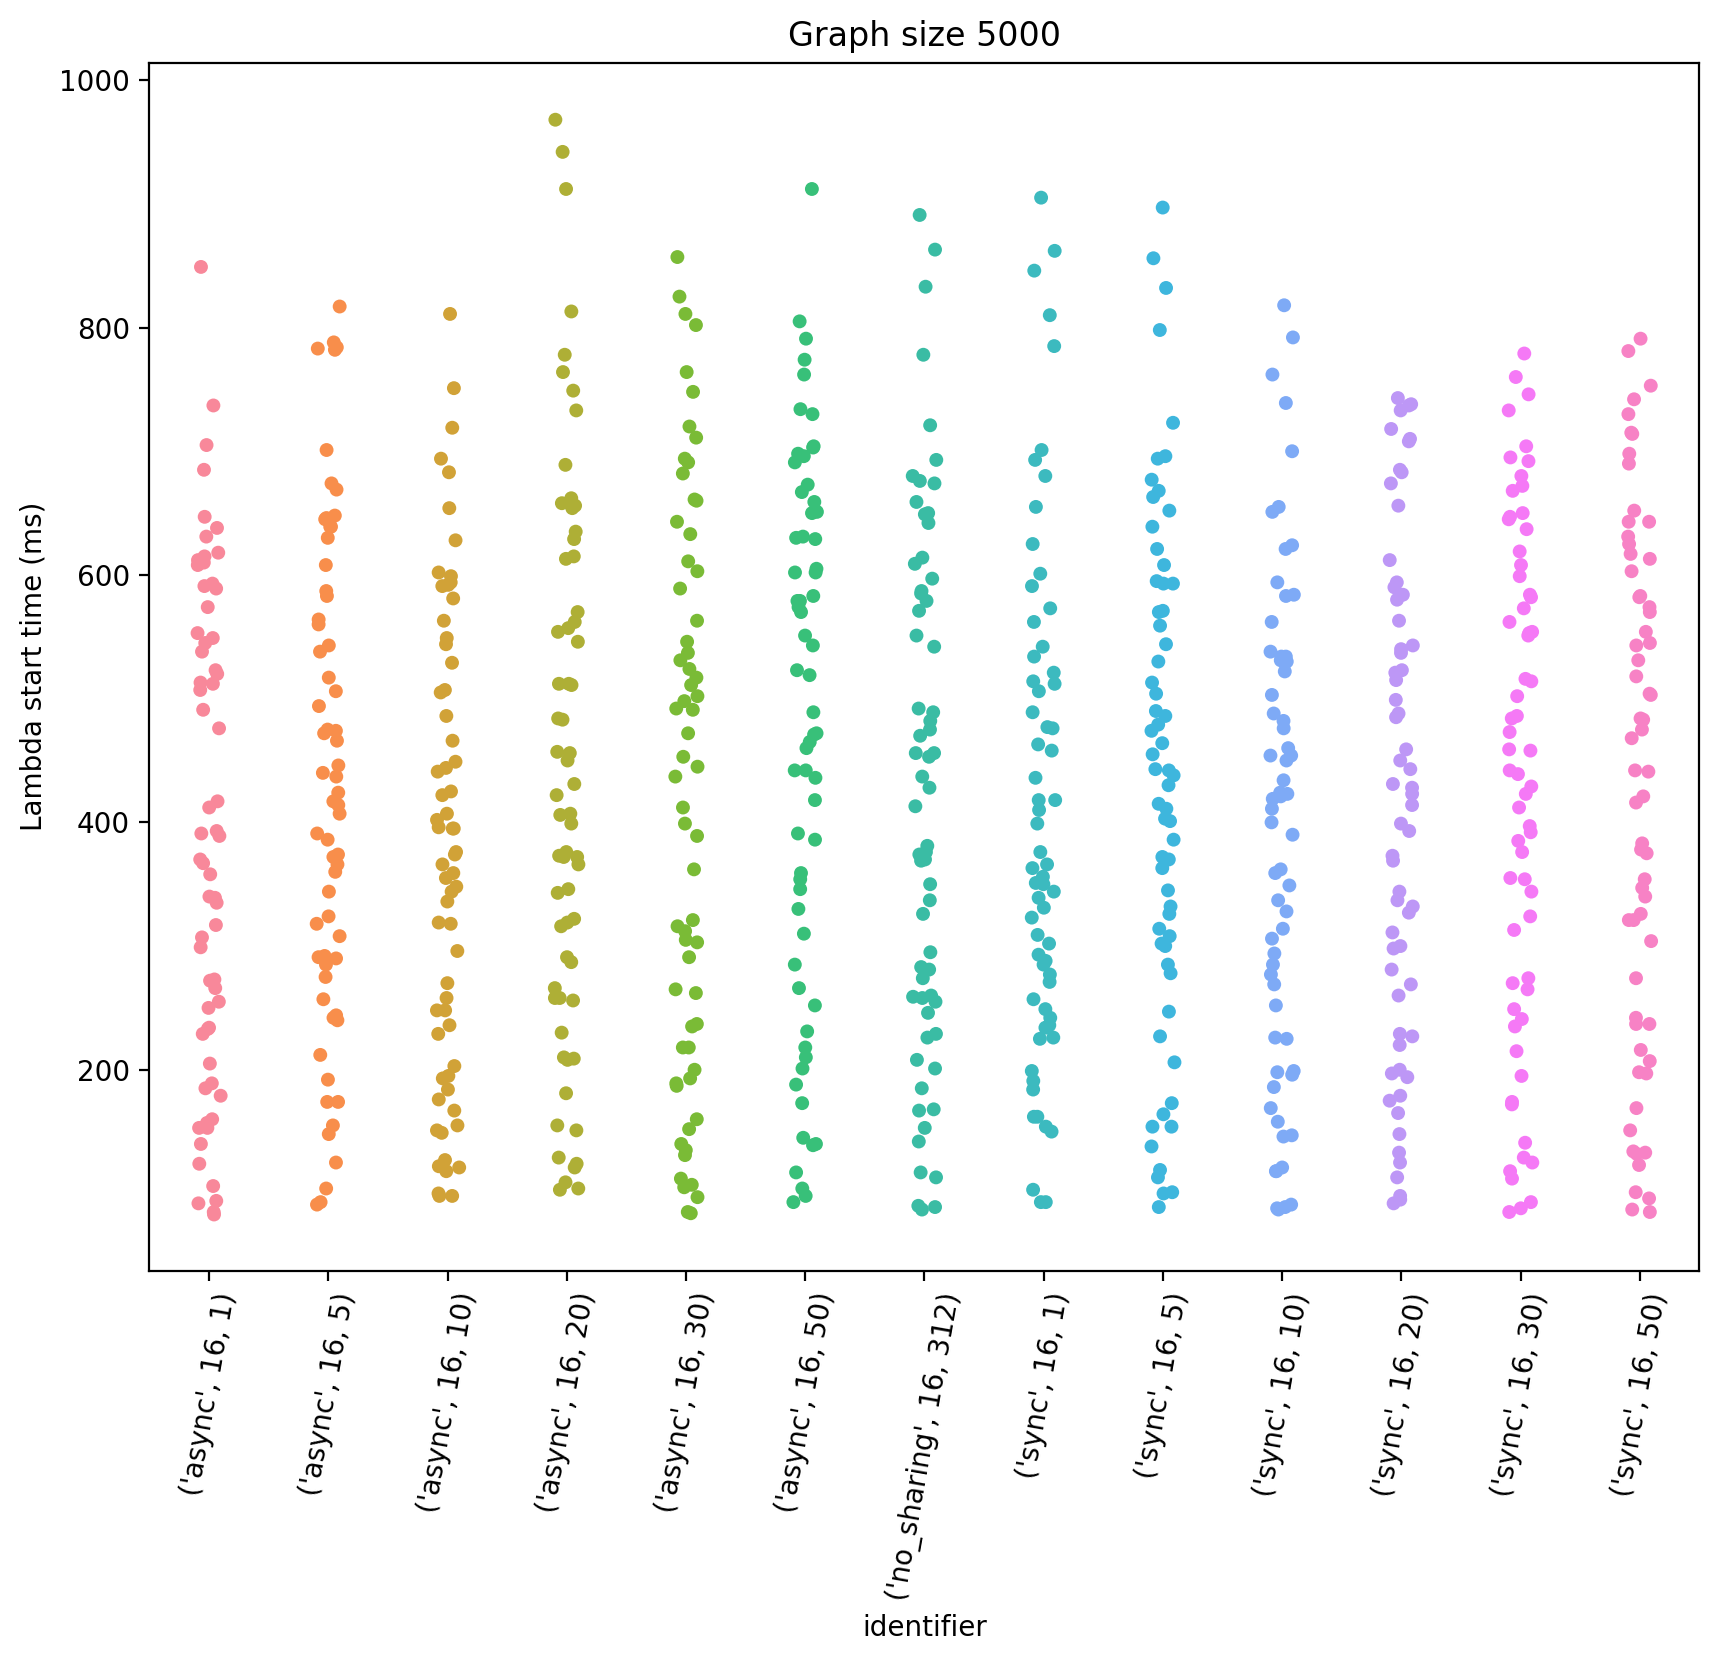

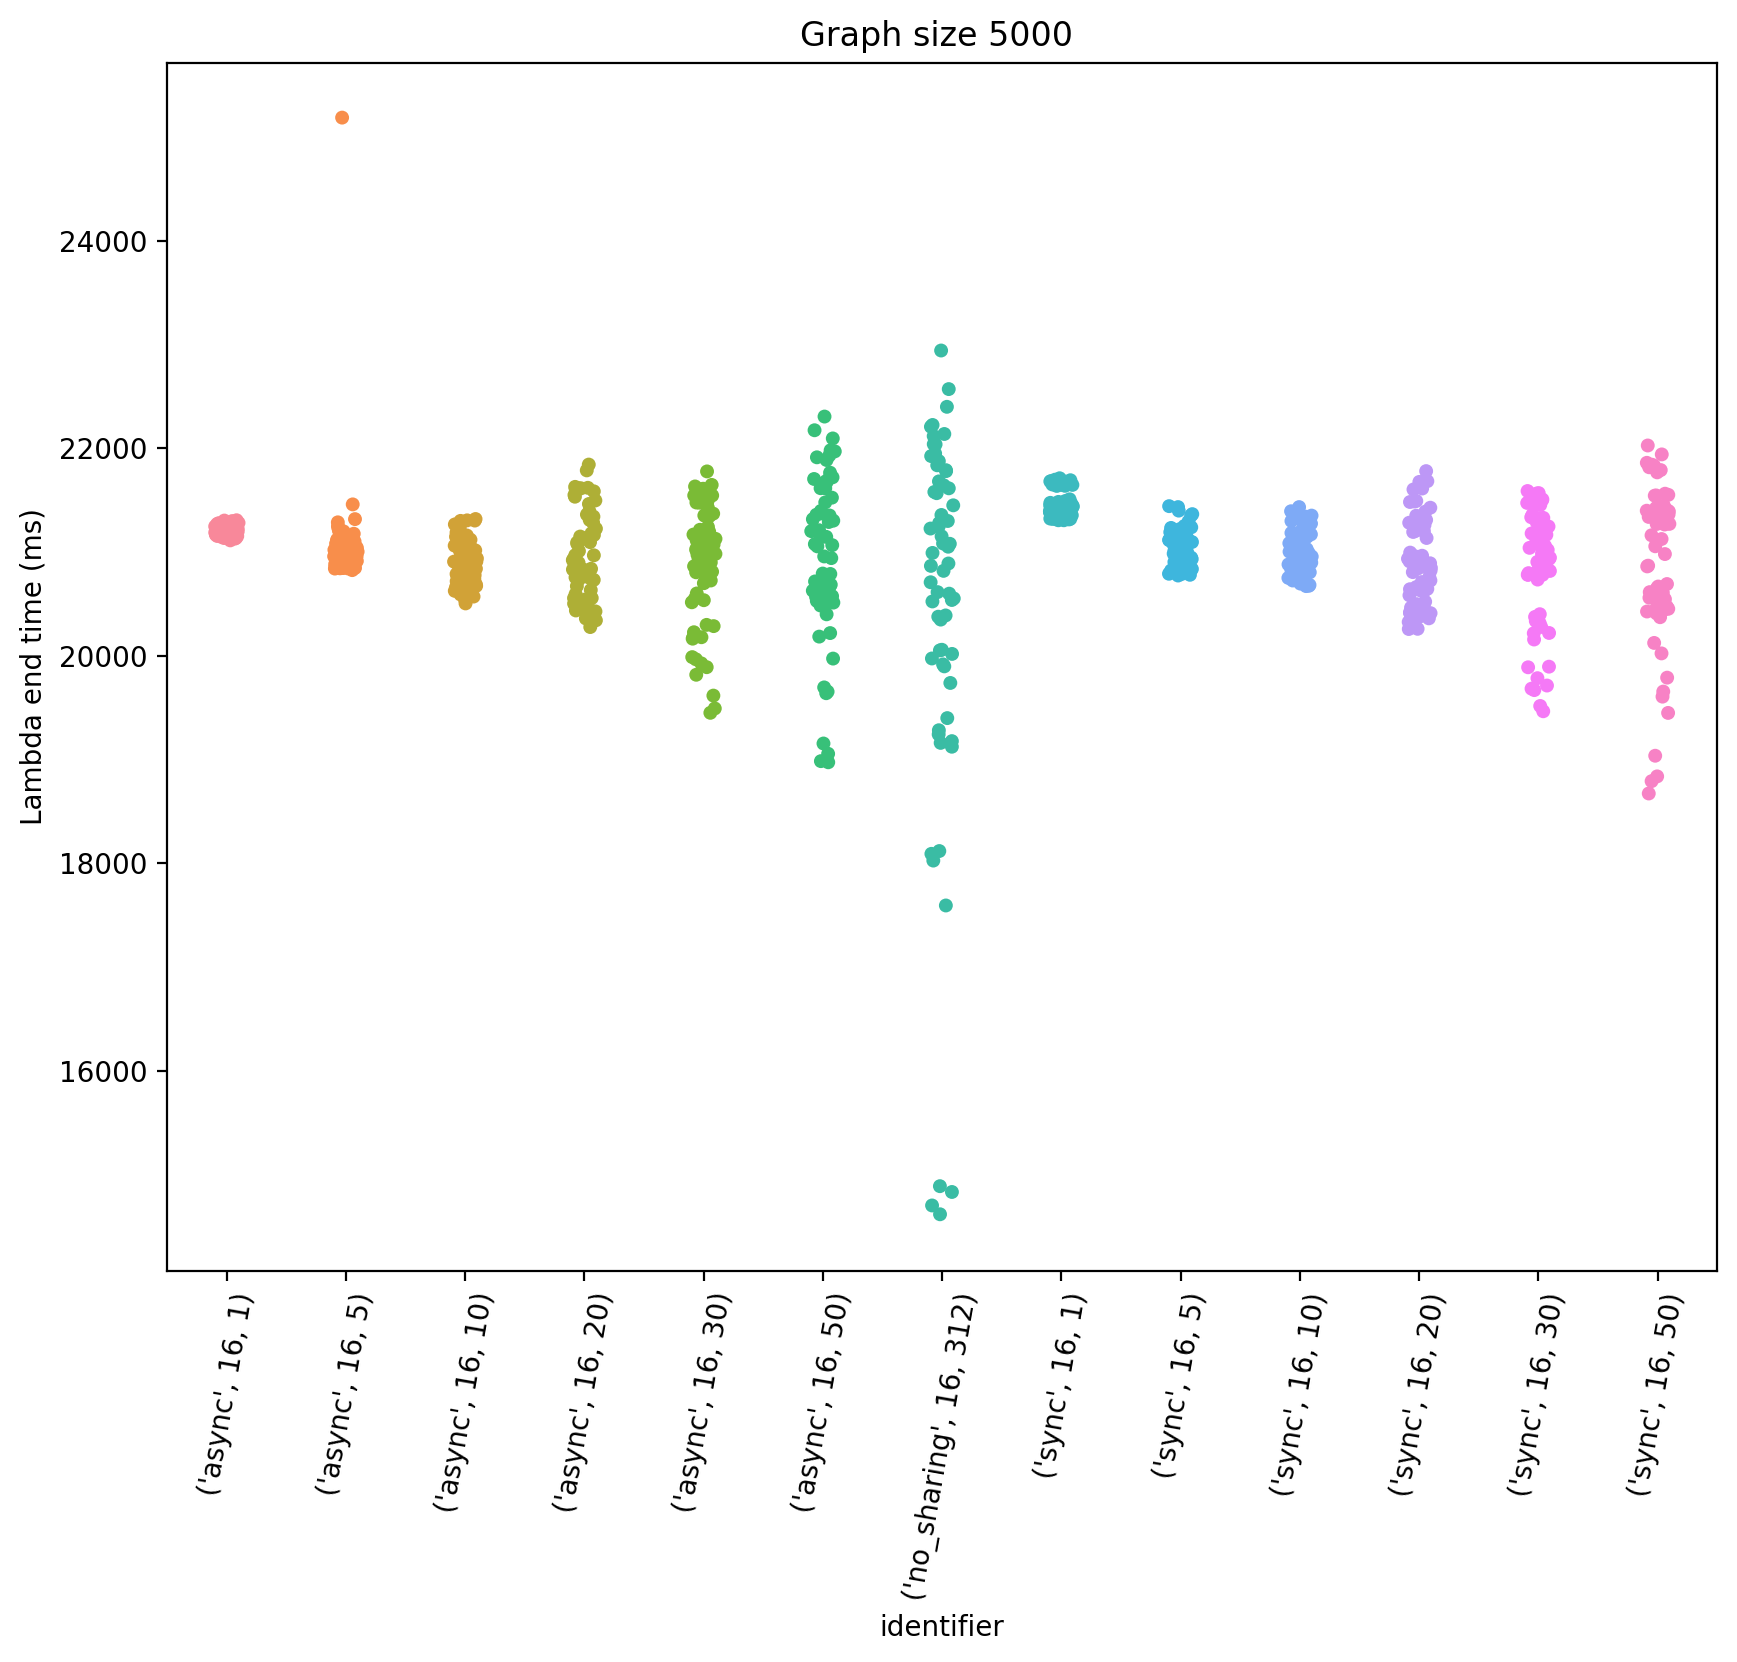

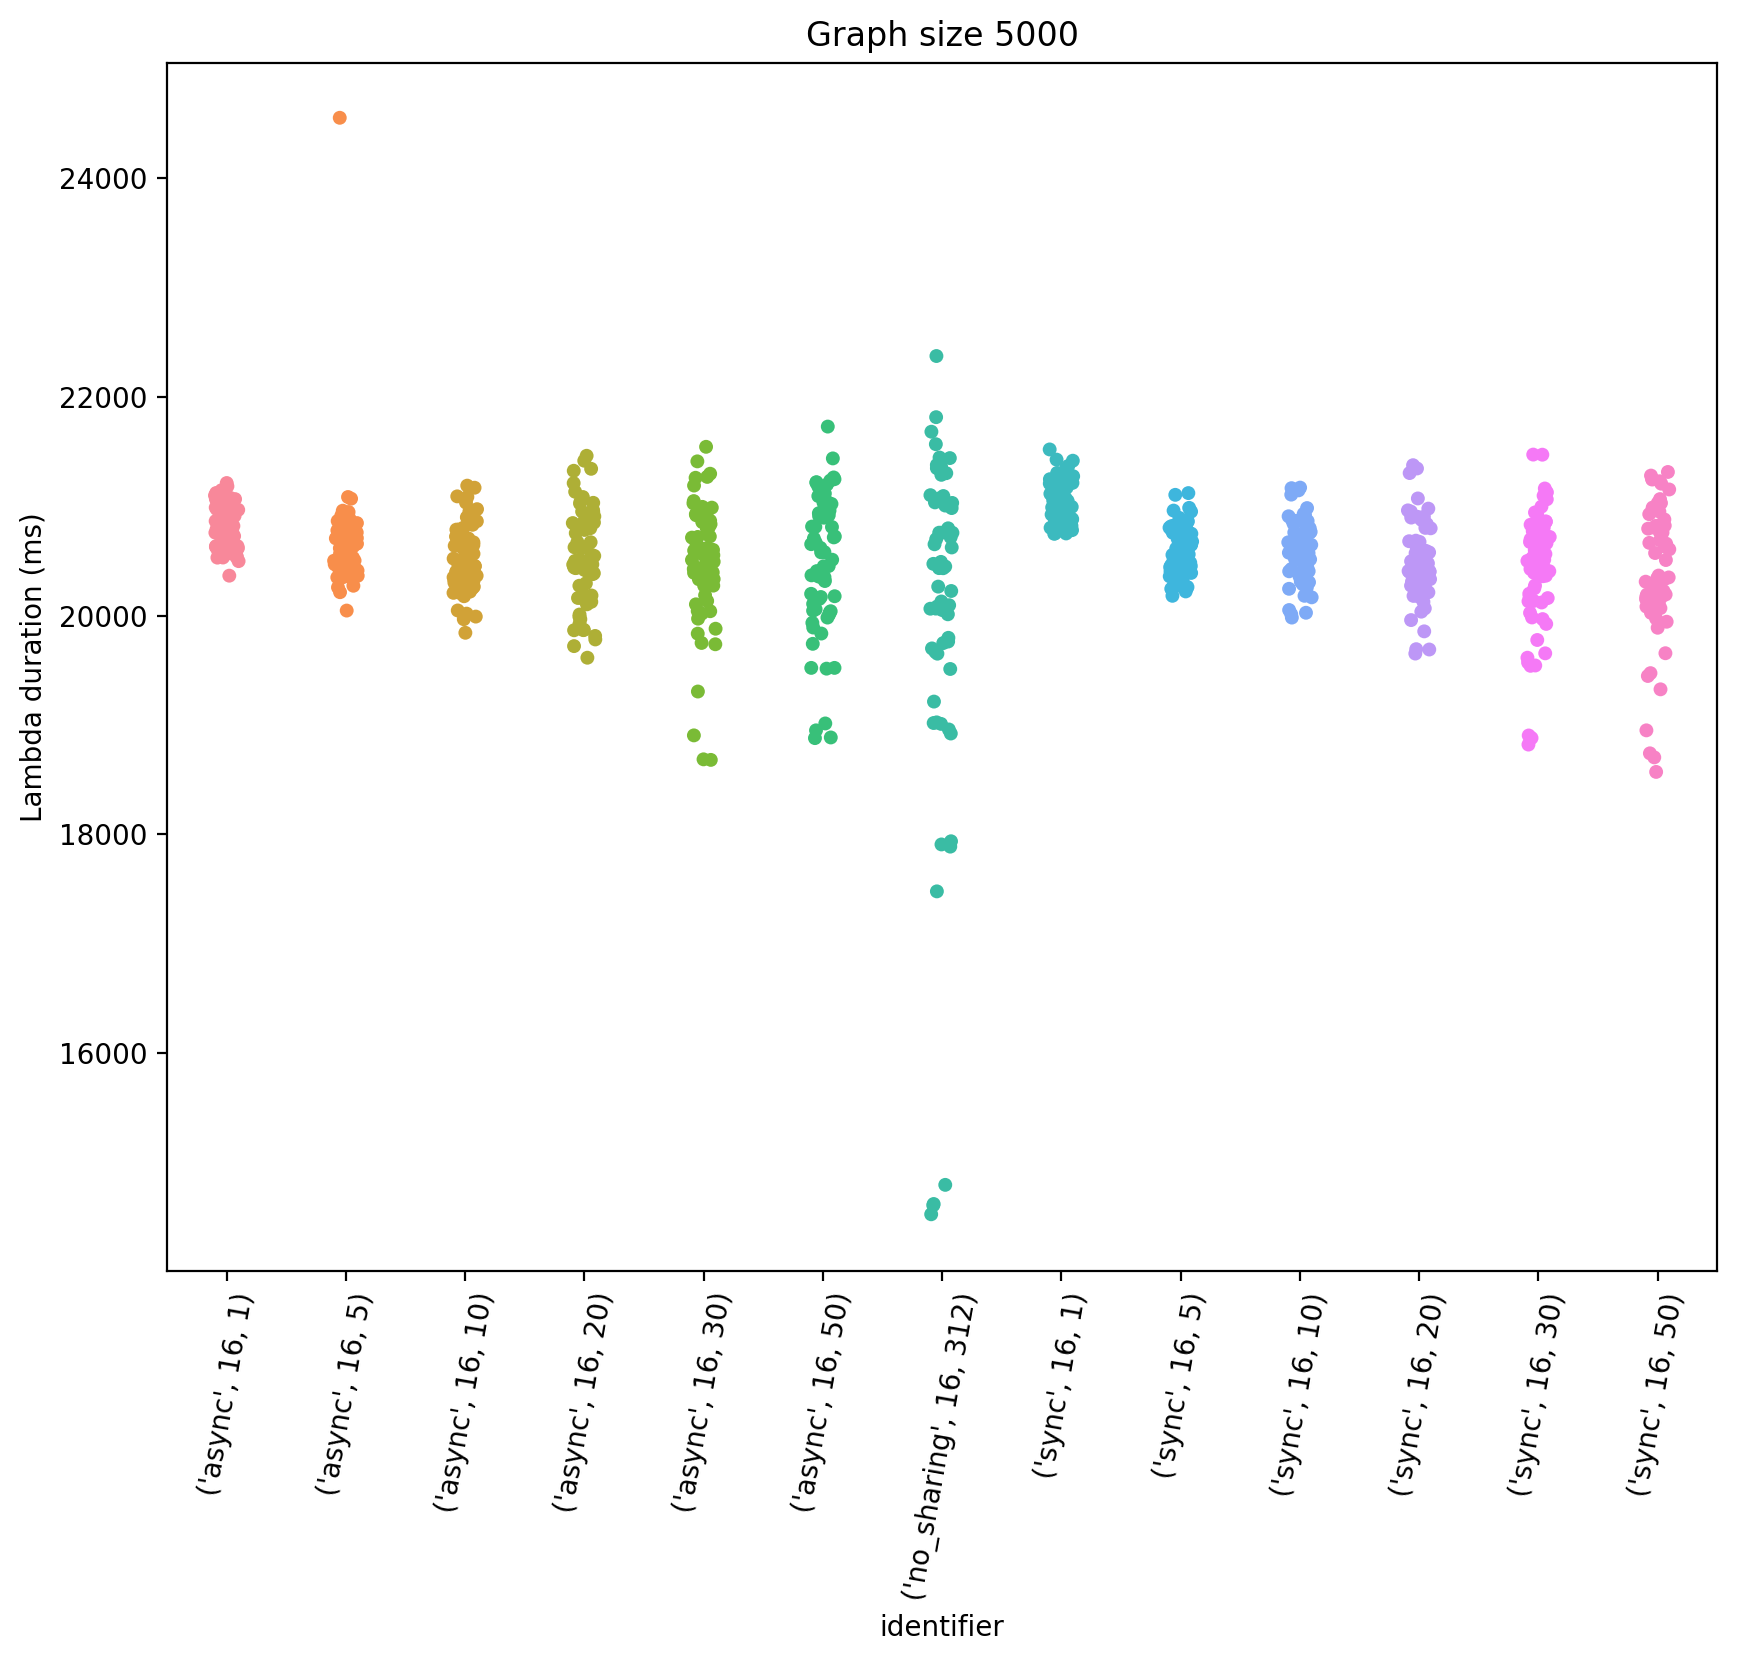

In [35]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.reset_index()
    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_start_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda start time (ms)")
    plt.title("Graph size {}".format(graph_size))
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_start_times_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_end_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda end time (ms)")
    plt.title("Graph size {} ".format(graph_size, ))
    plt.savefig("{}/lambda_end_times_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.xticks(rotation=80)
    plt.show()


    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_duration", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda duration (ms)")
    plt.title("Graph size {}".format(graph_size,))
    plt.savefig("{}/lambda_duration_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.xticks(rotation=80)
    plt.show()



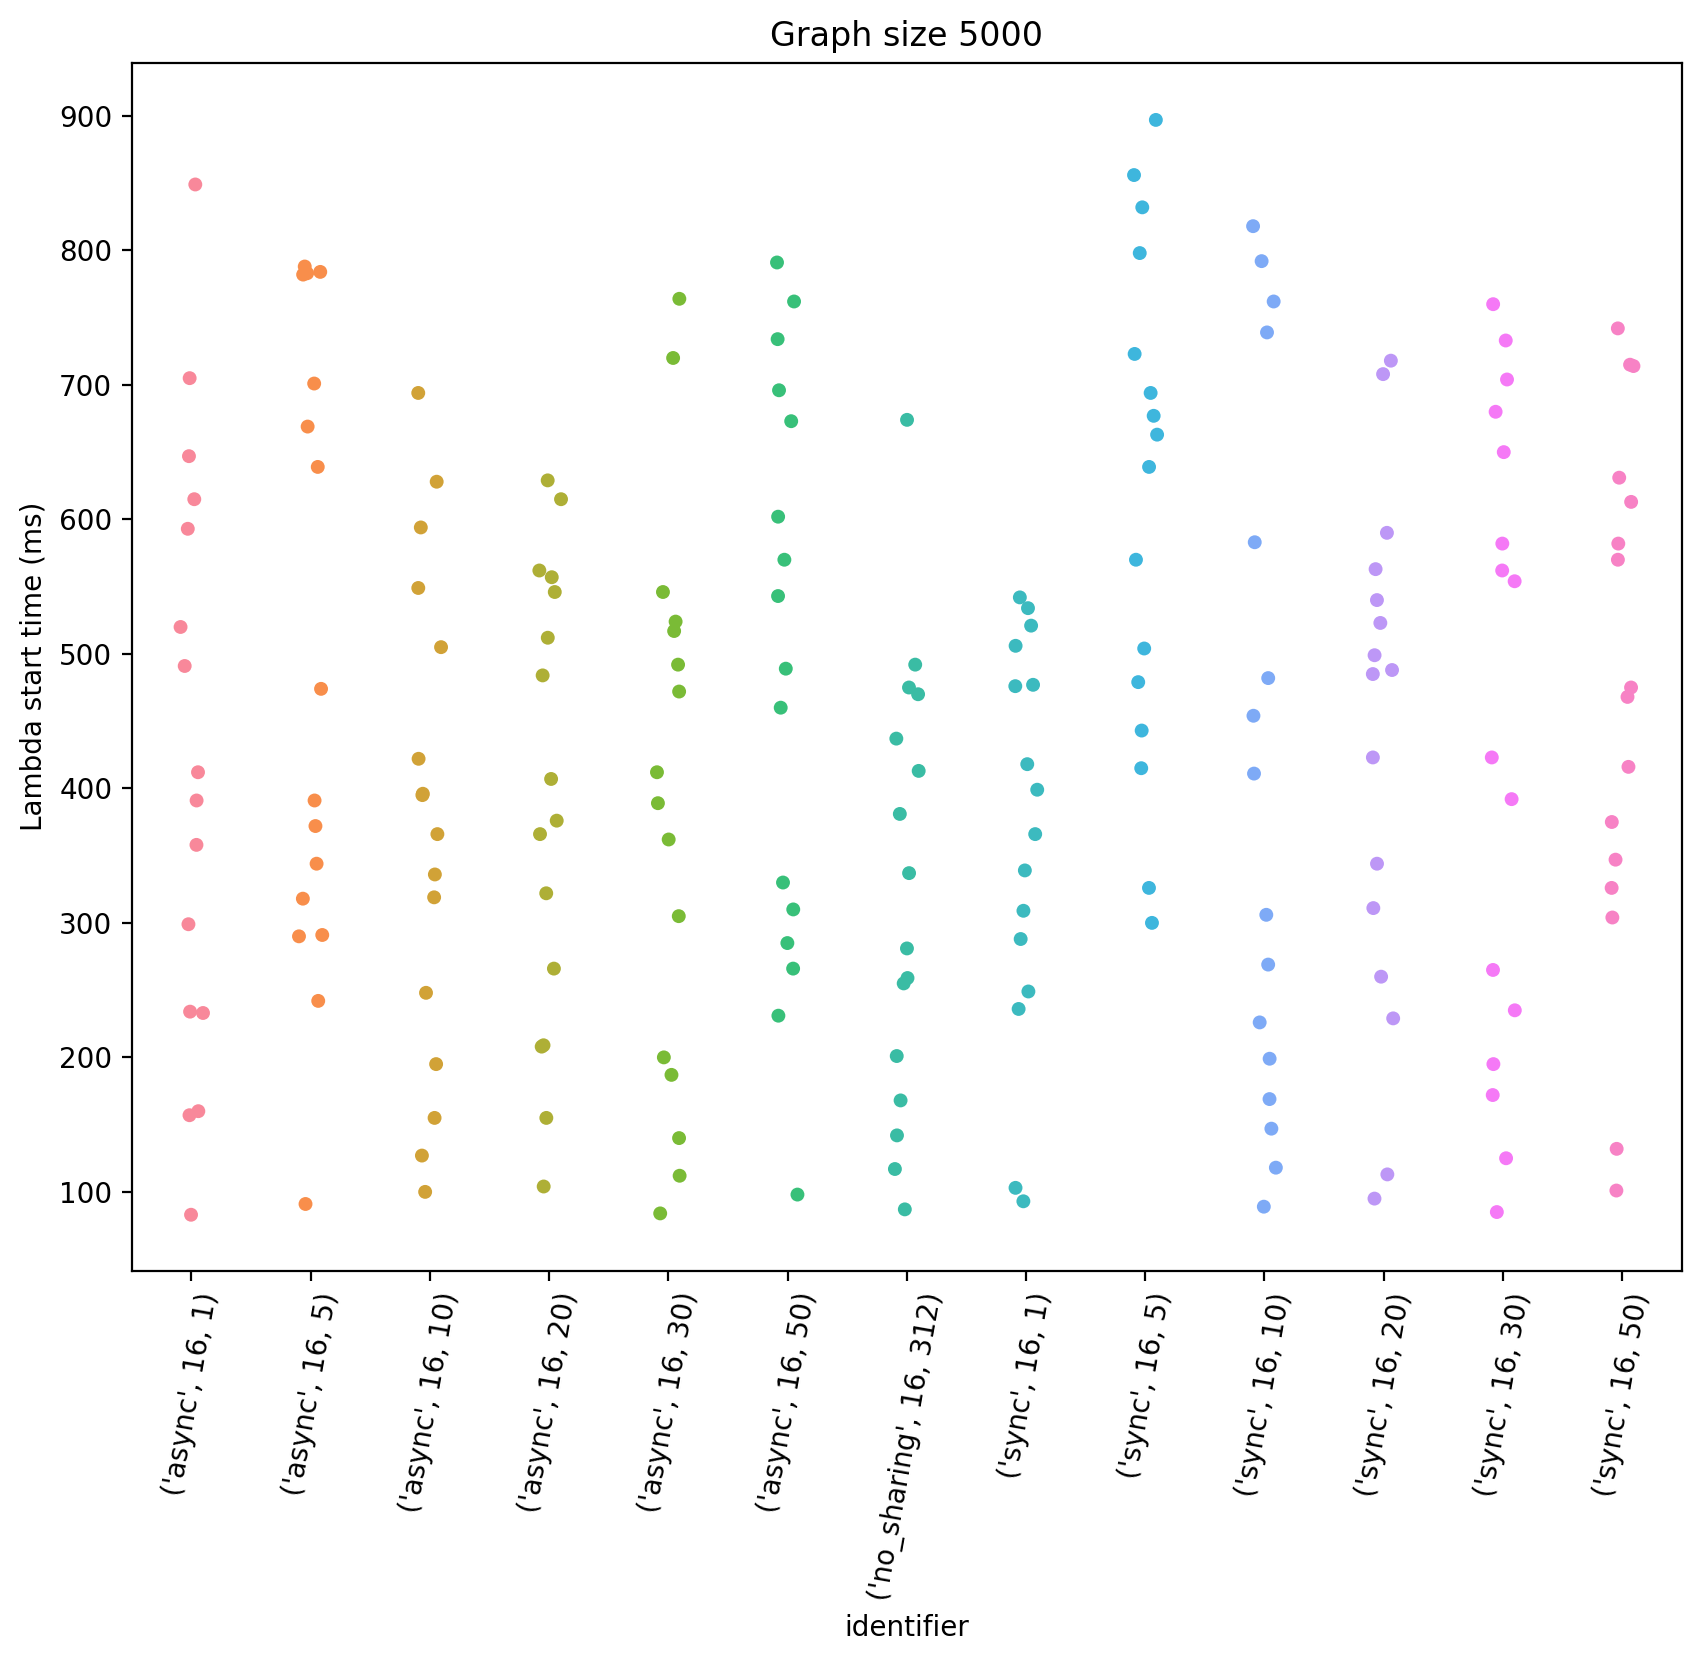

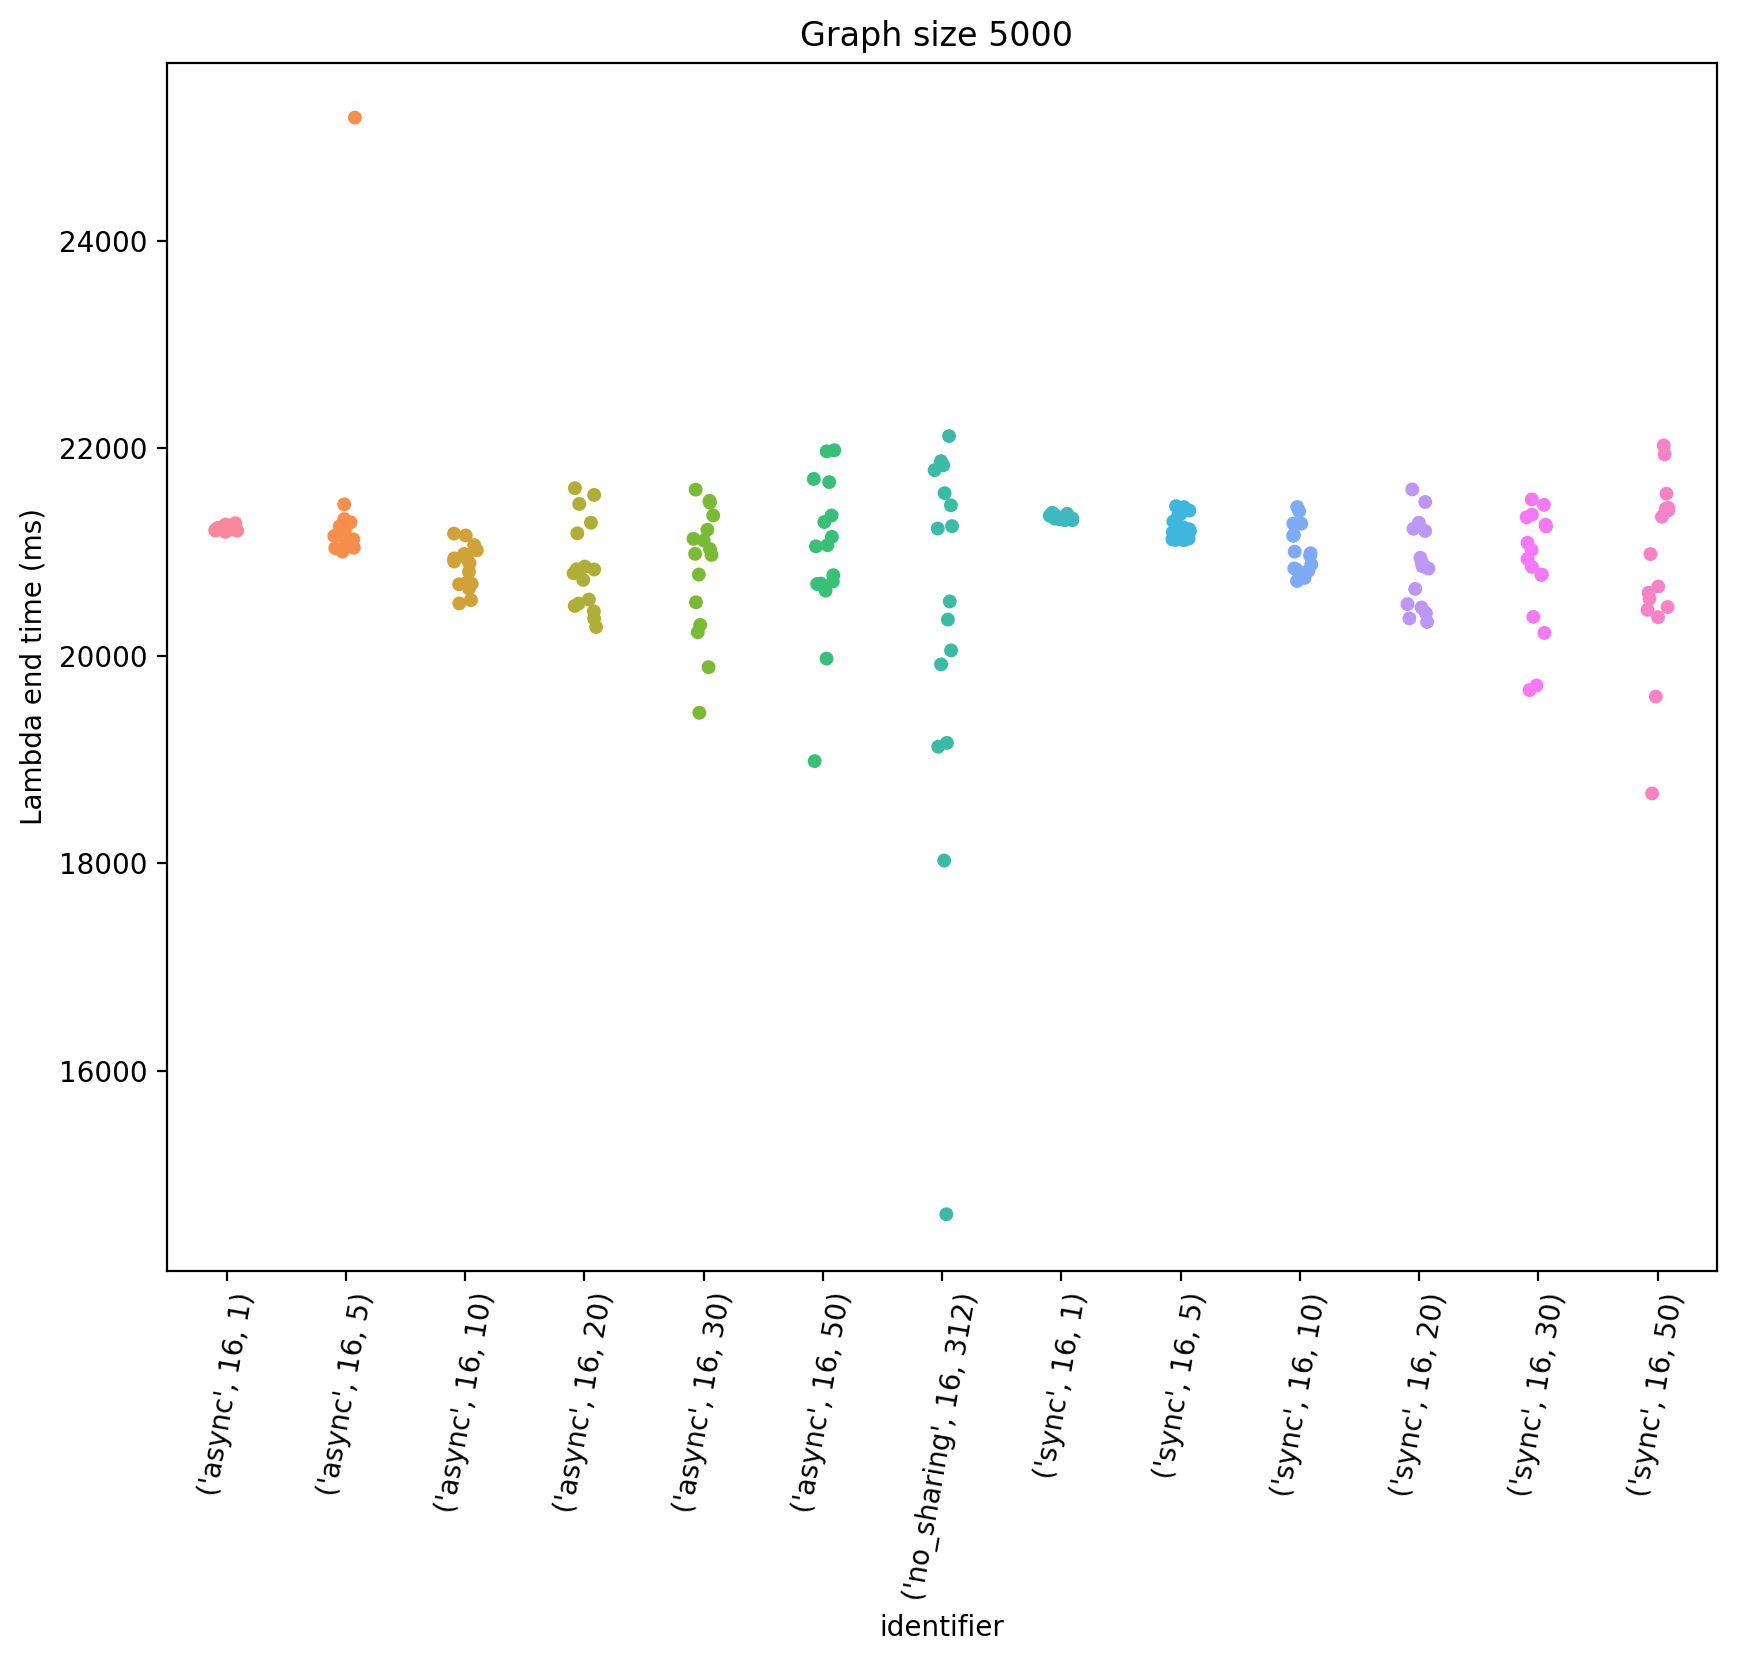

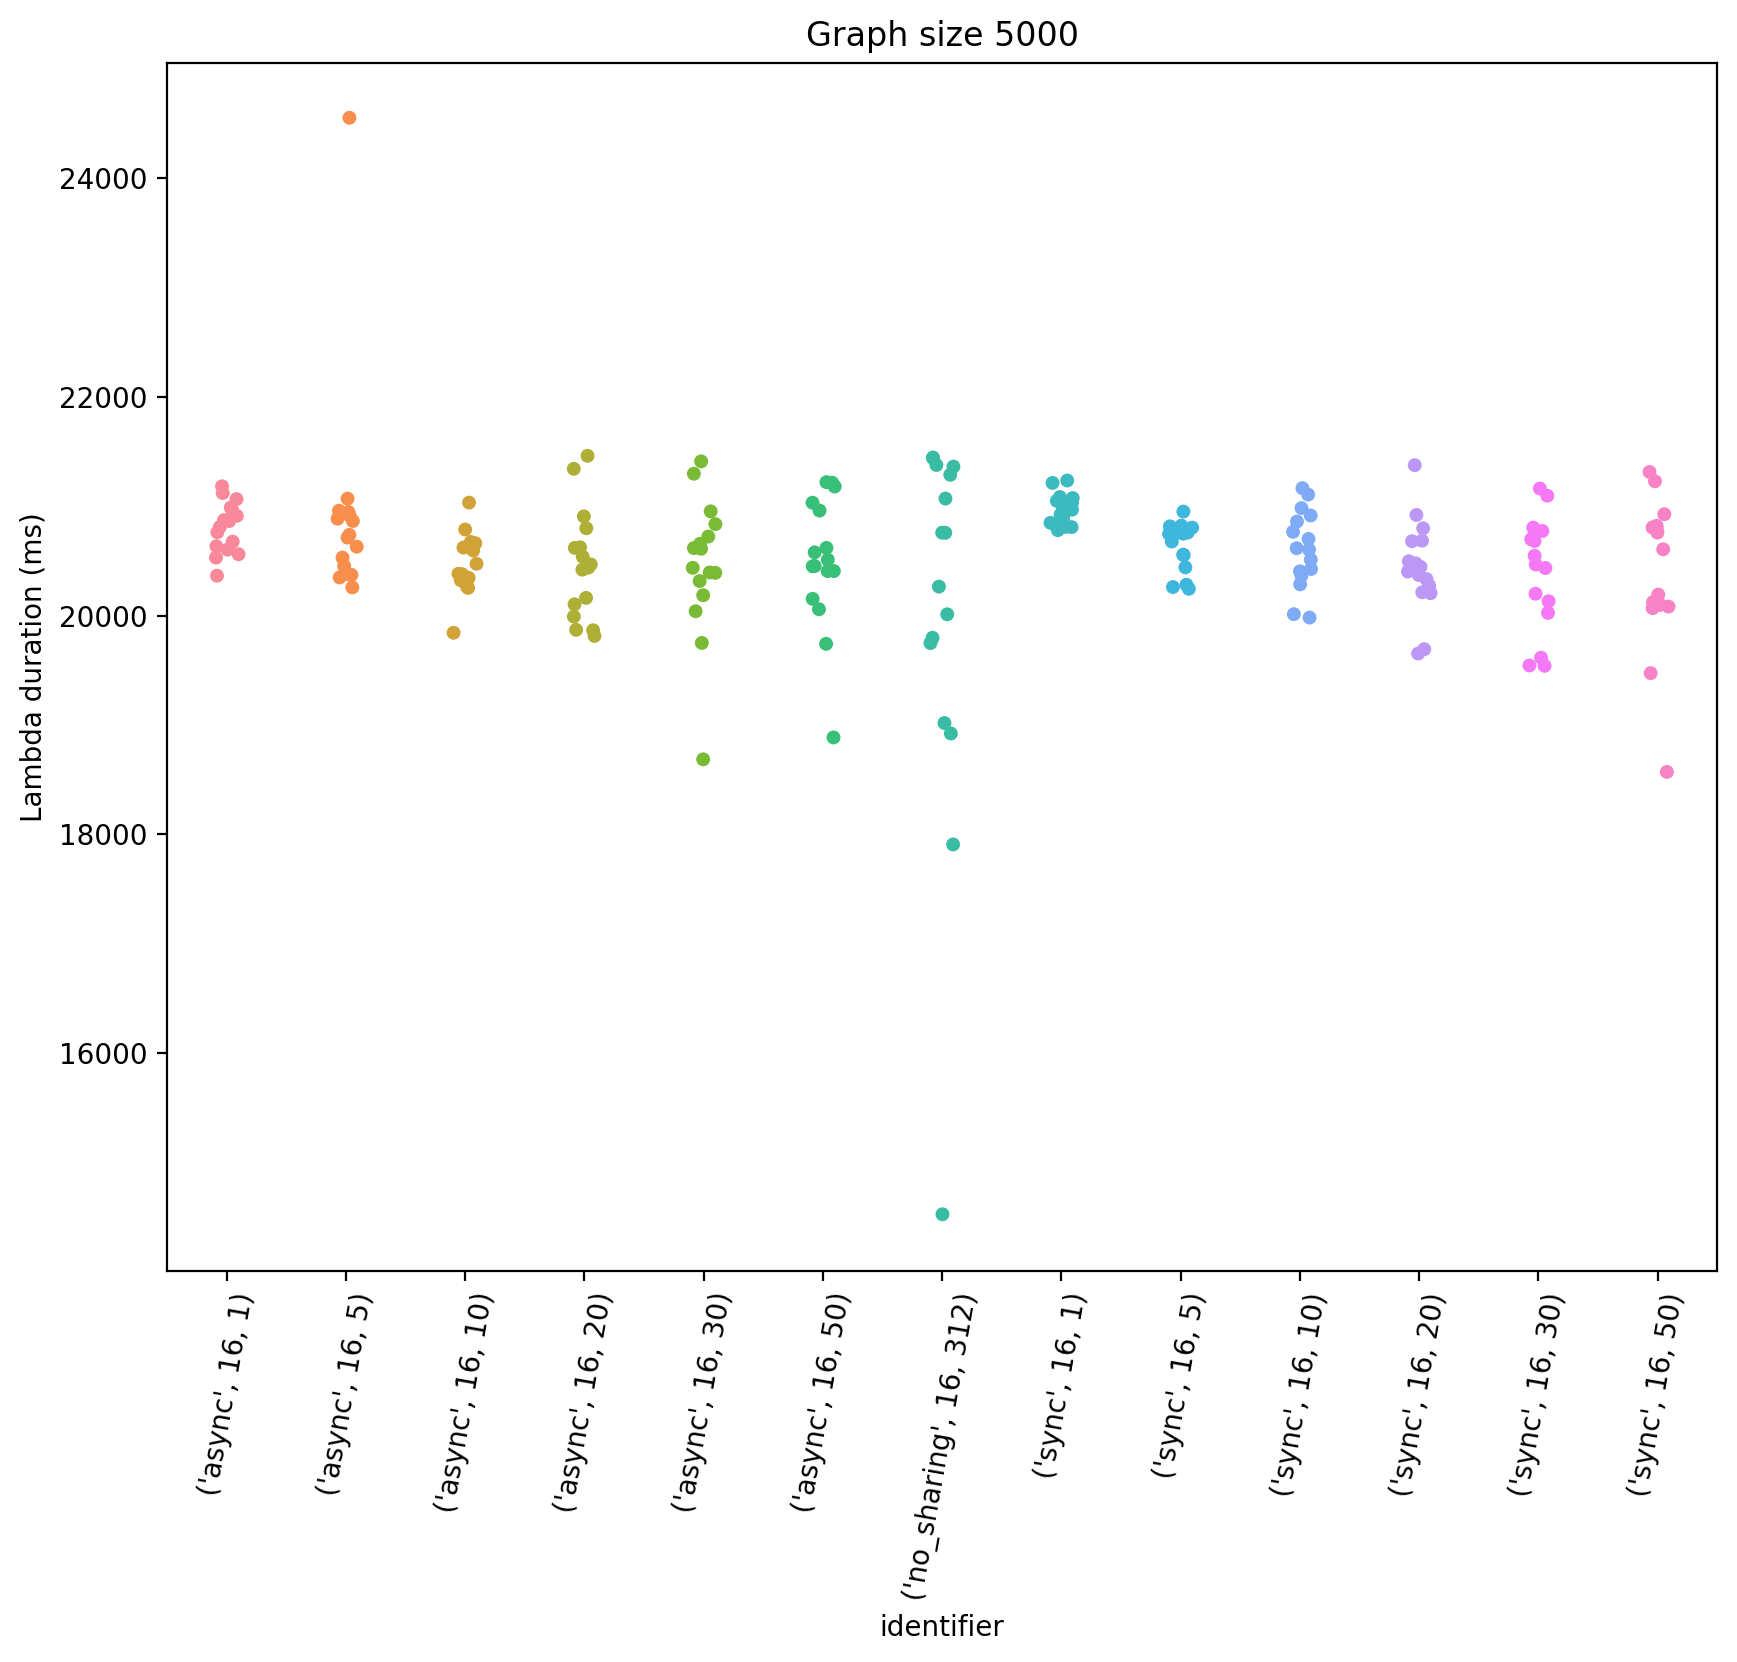

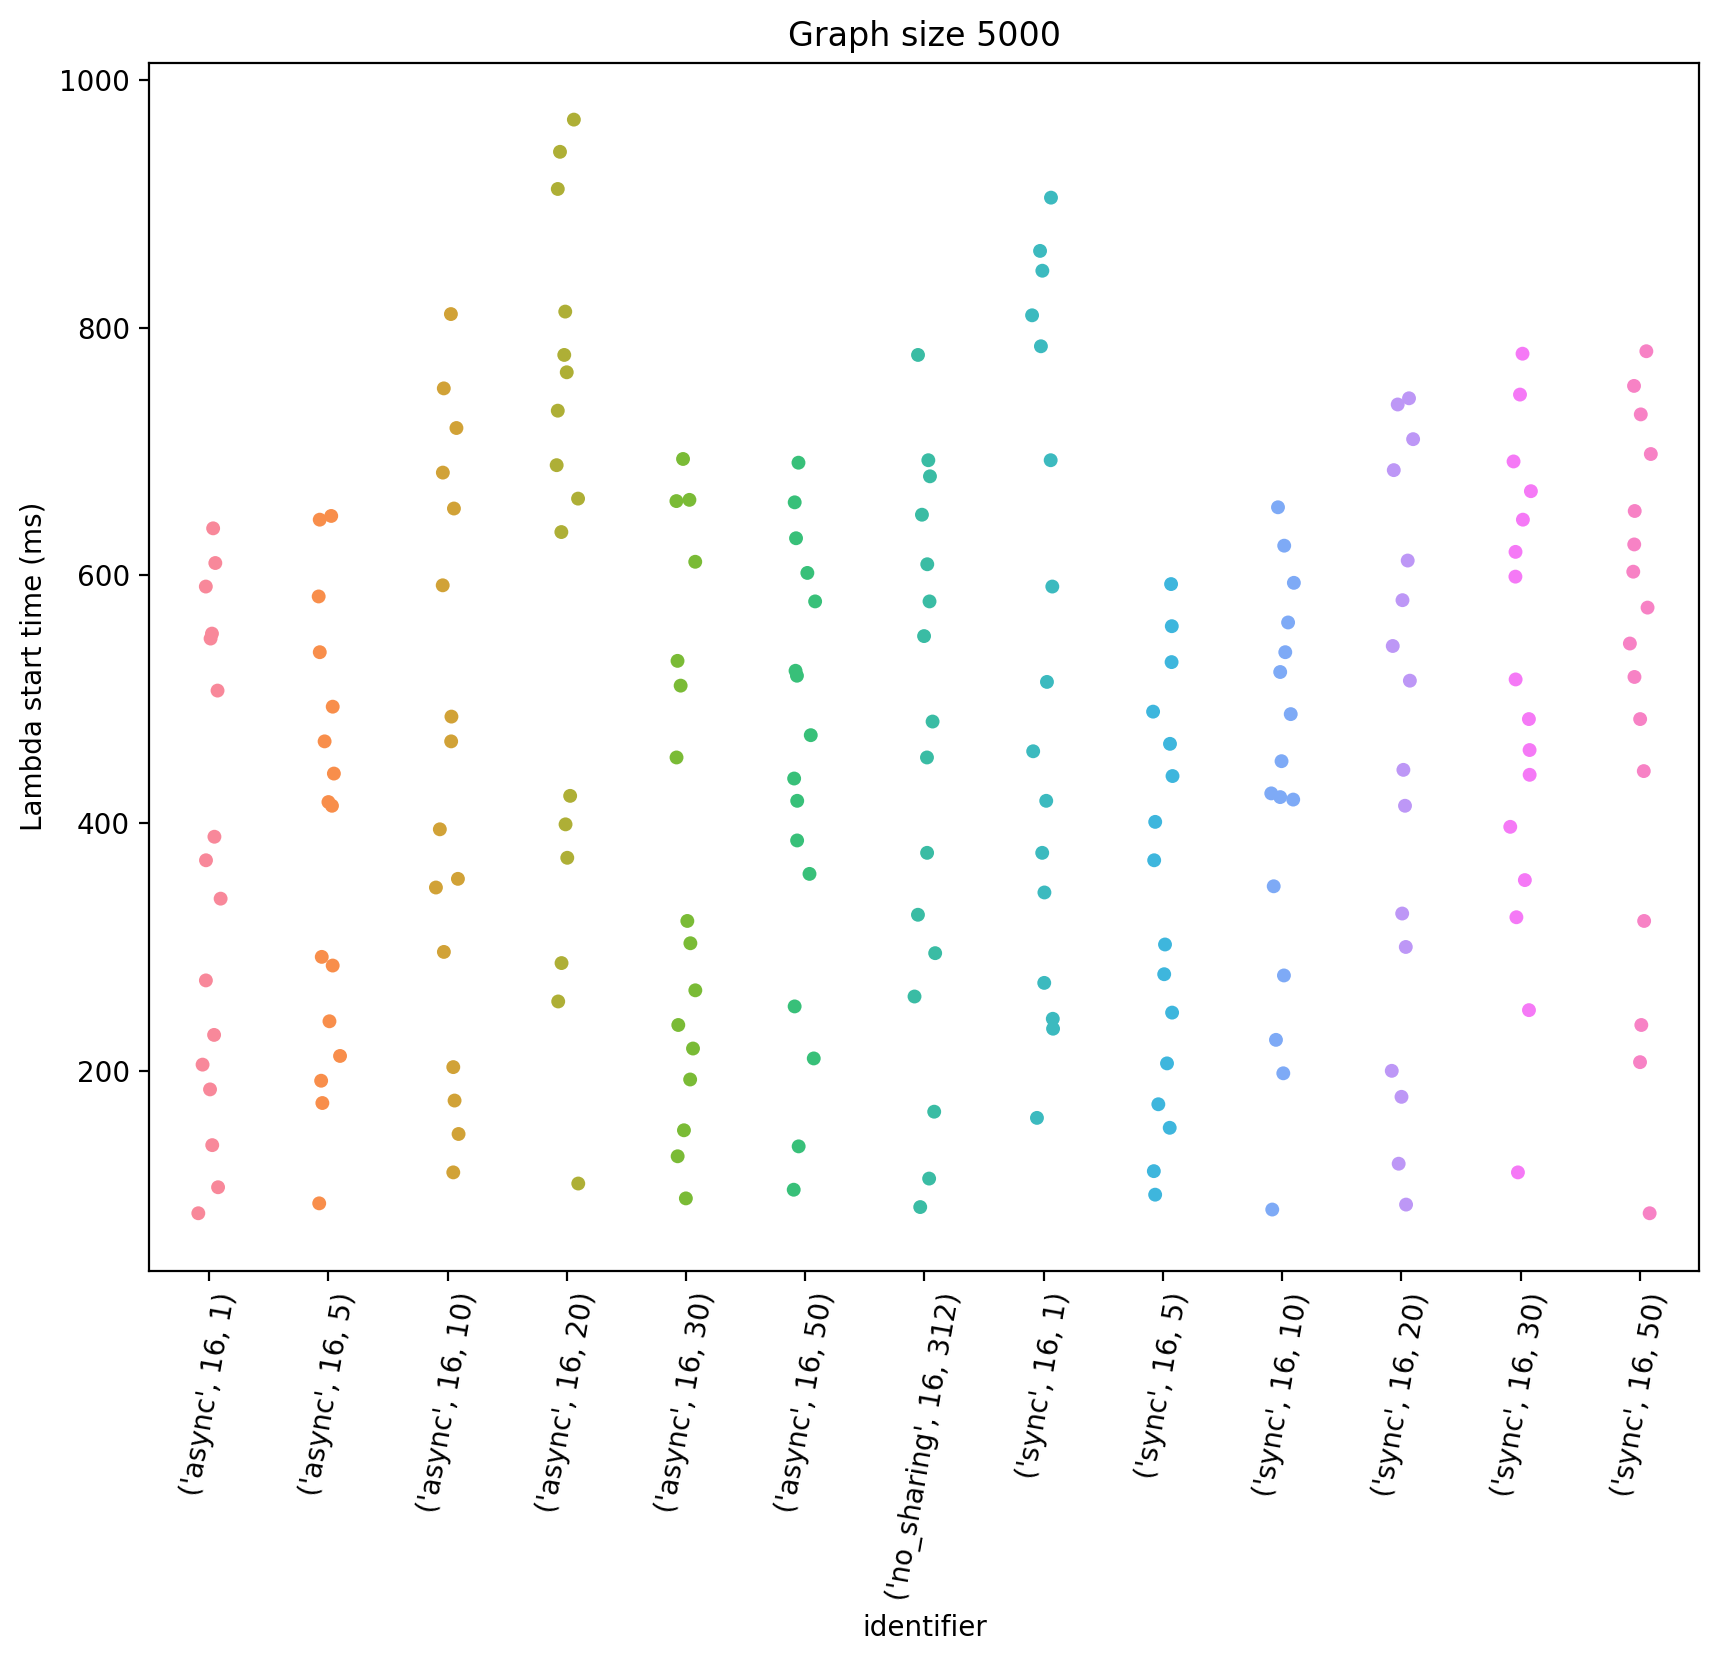

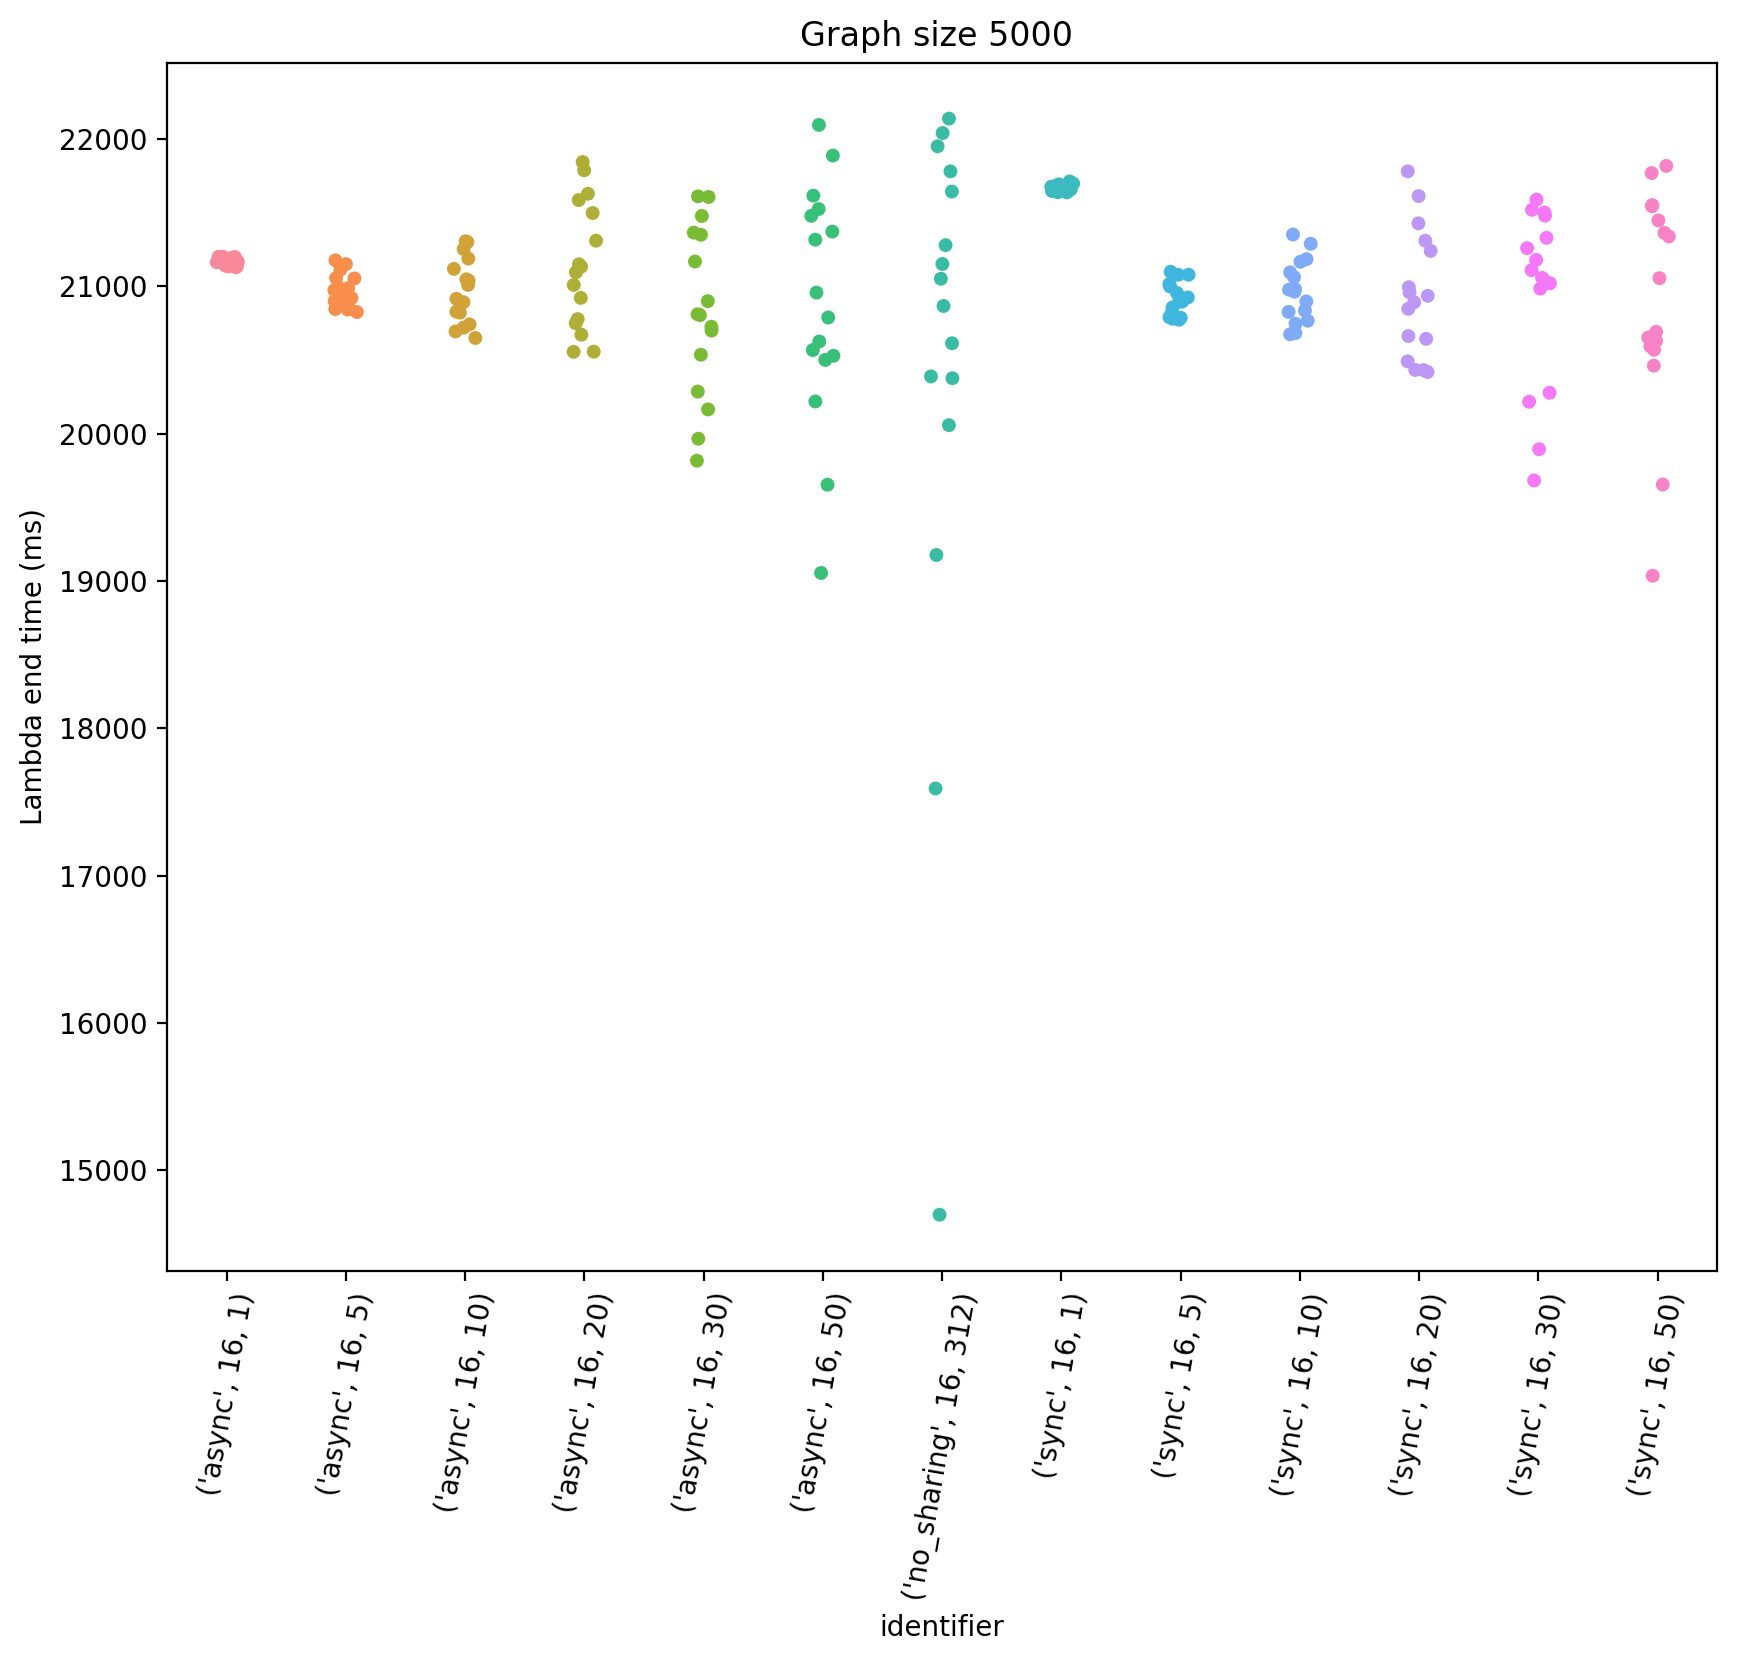

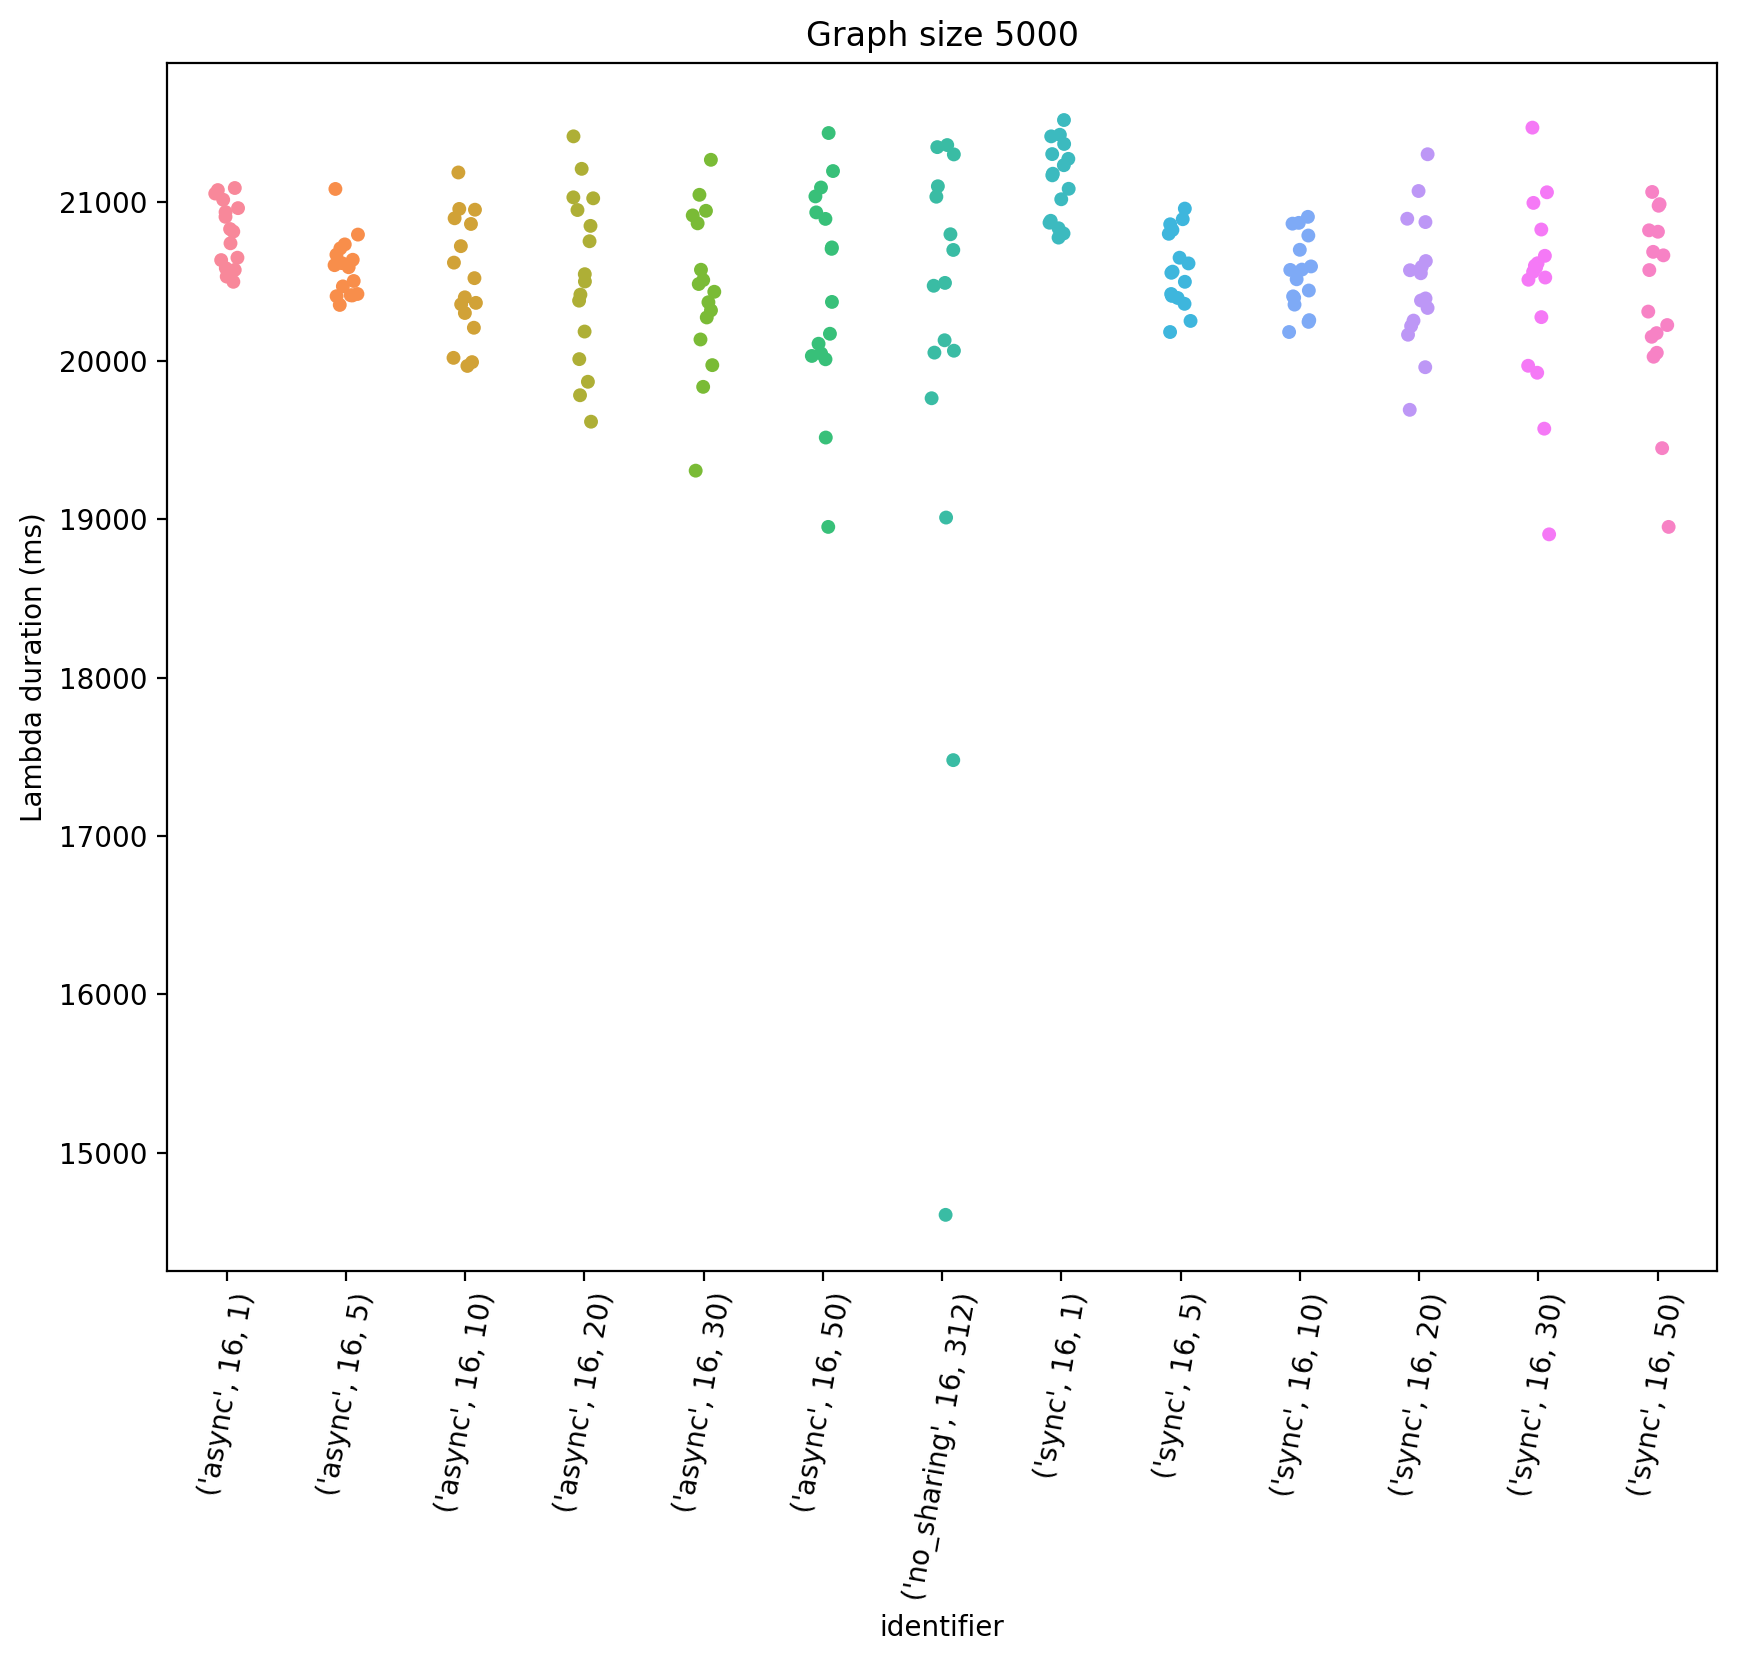

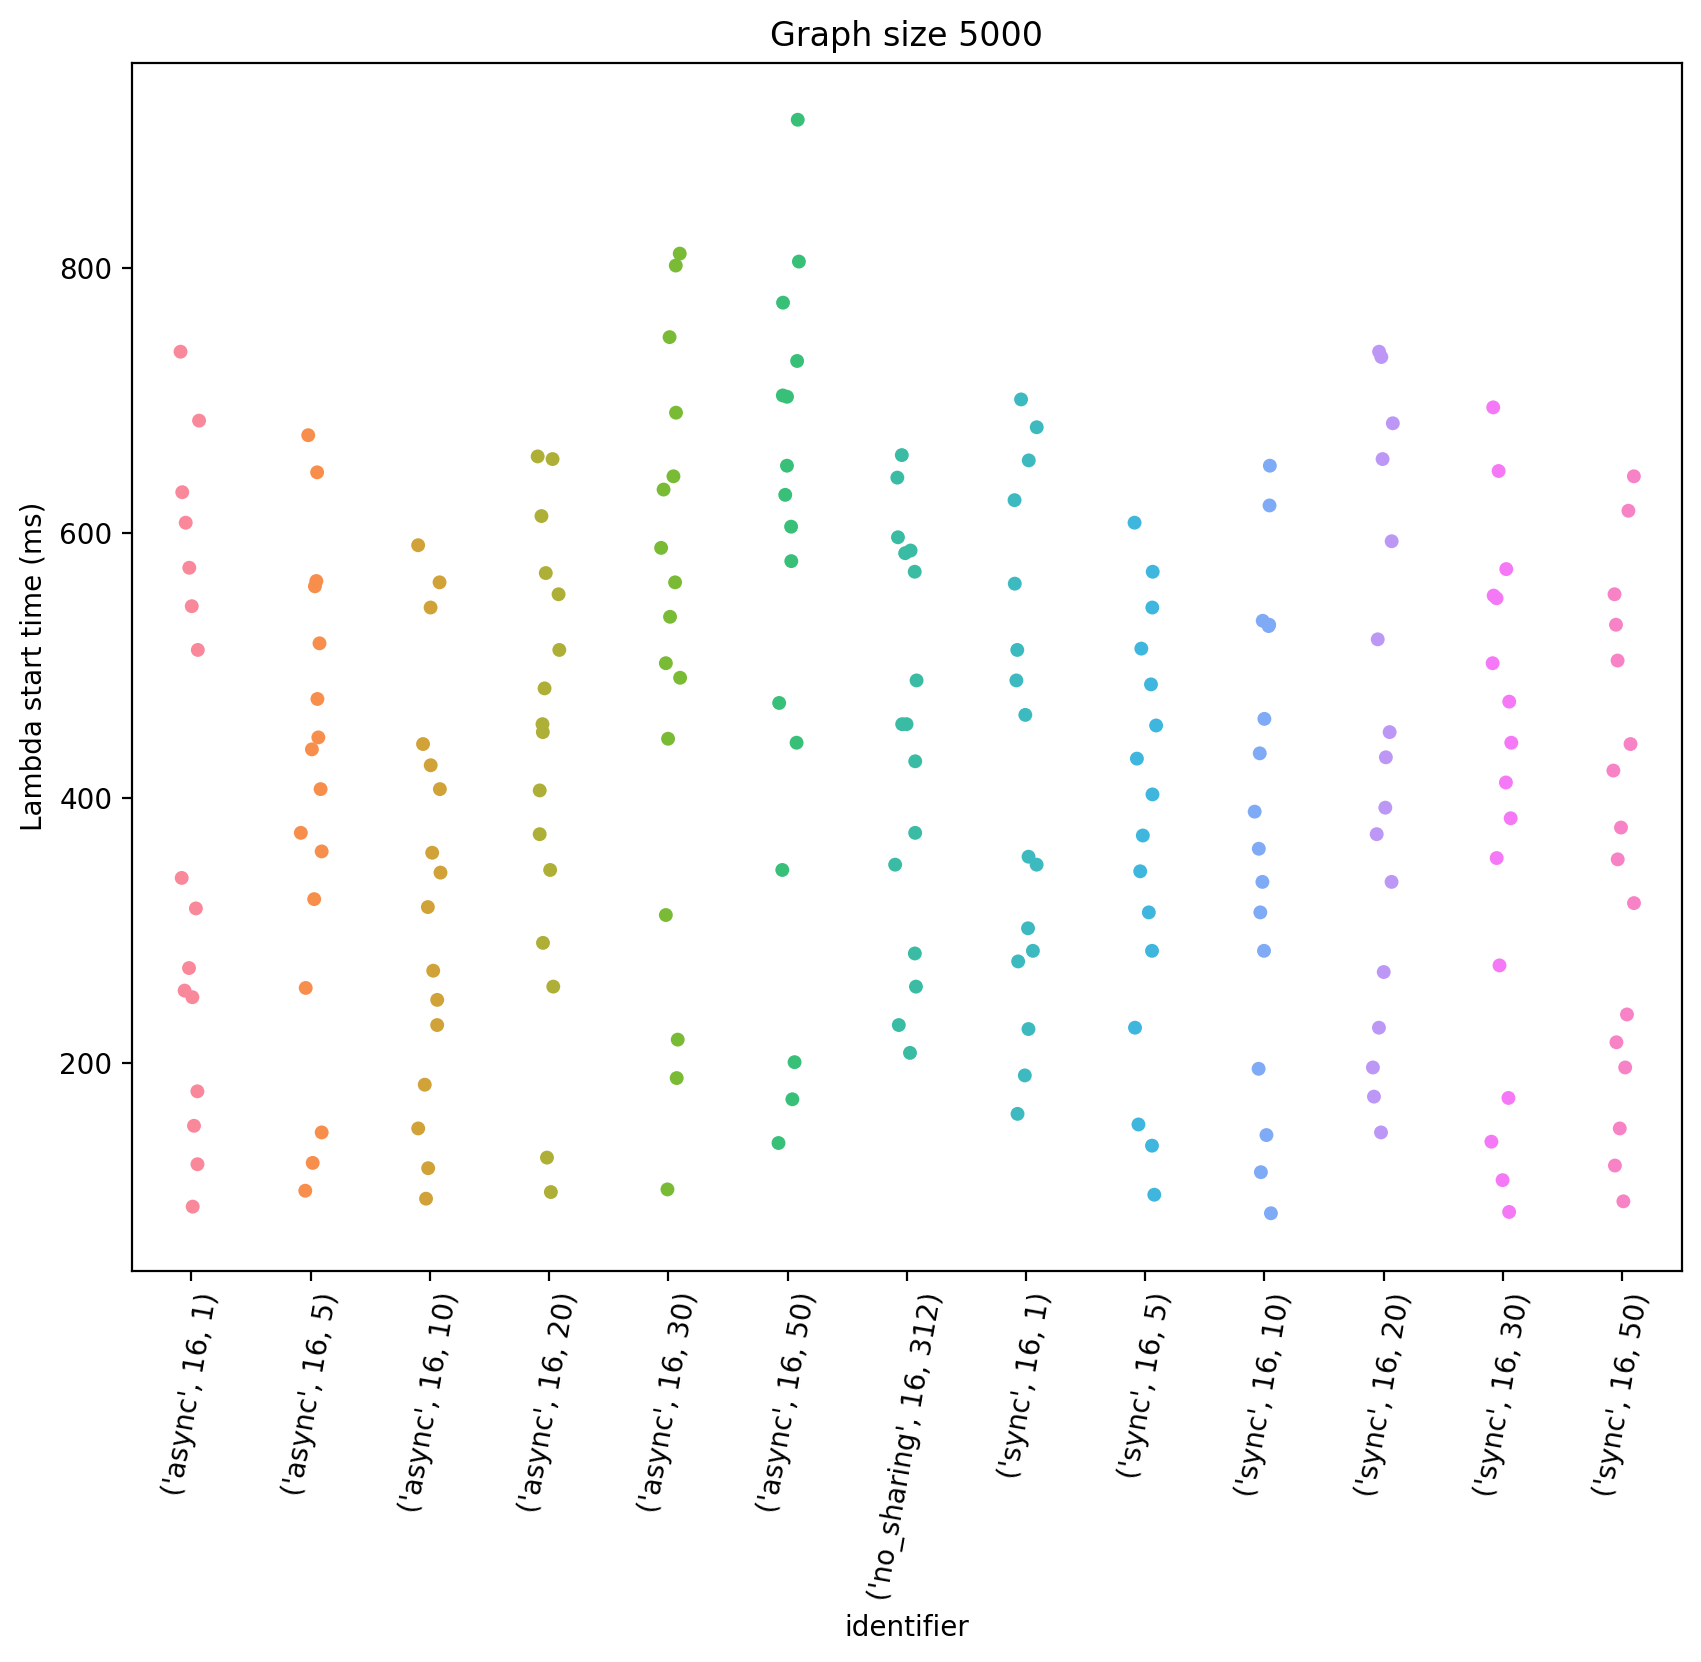

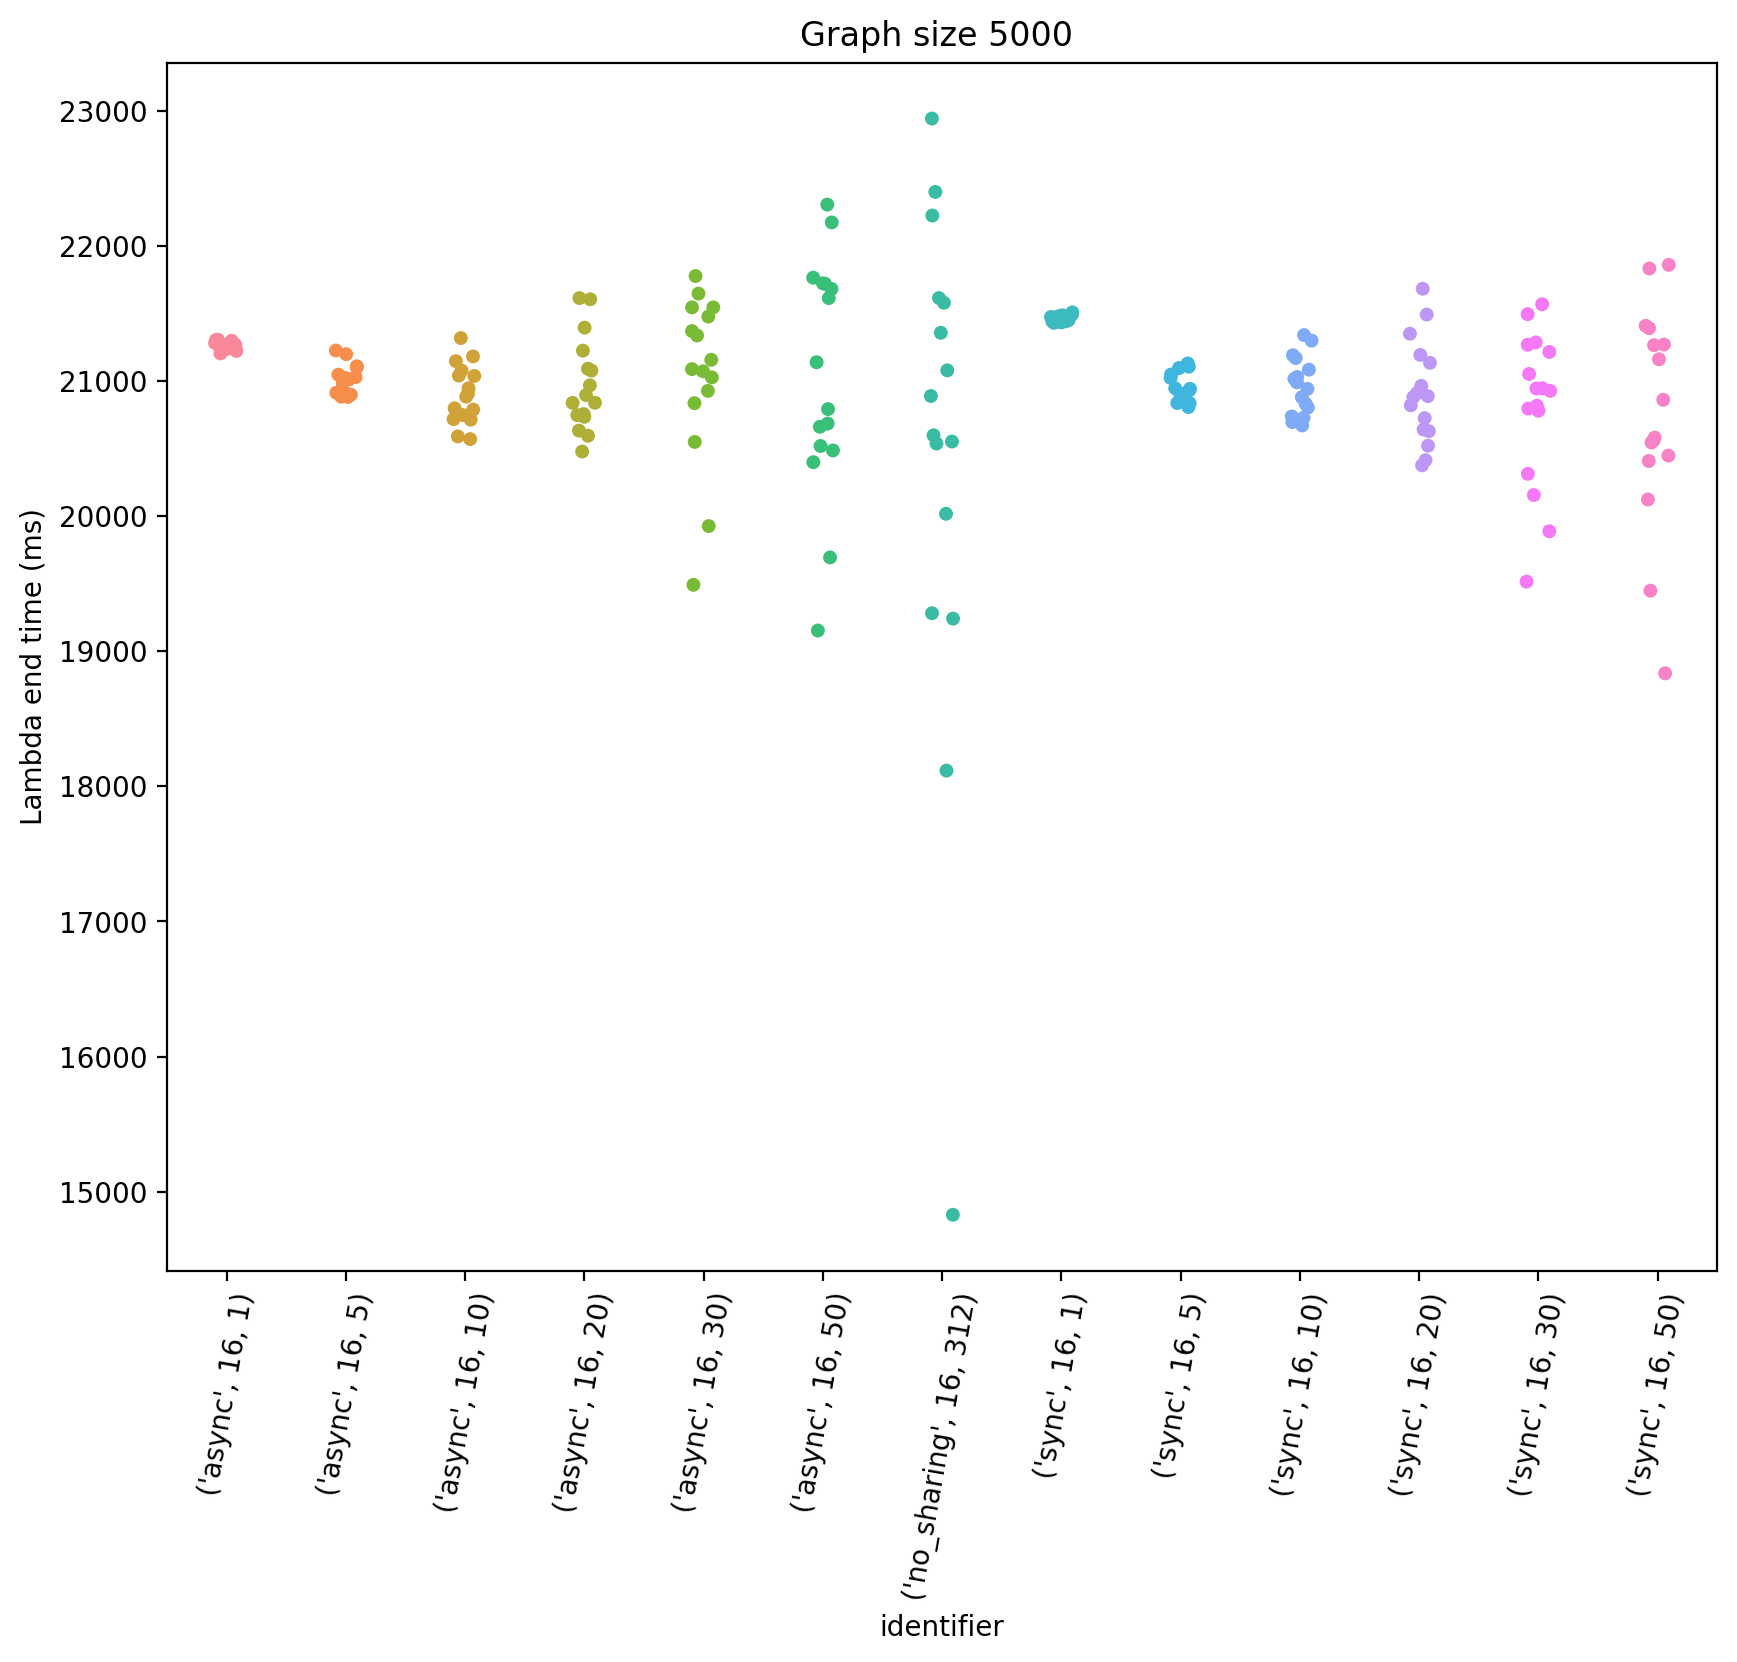

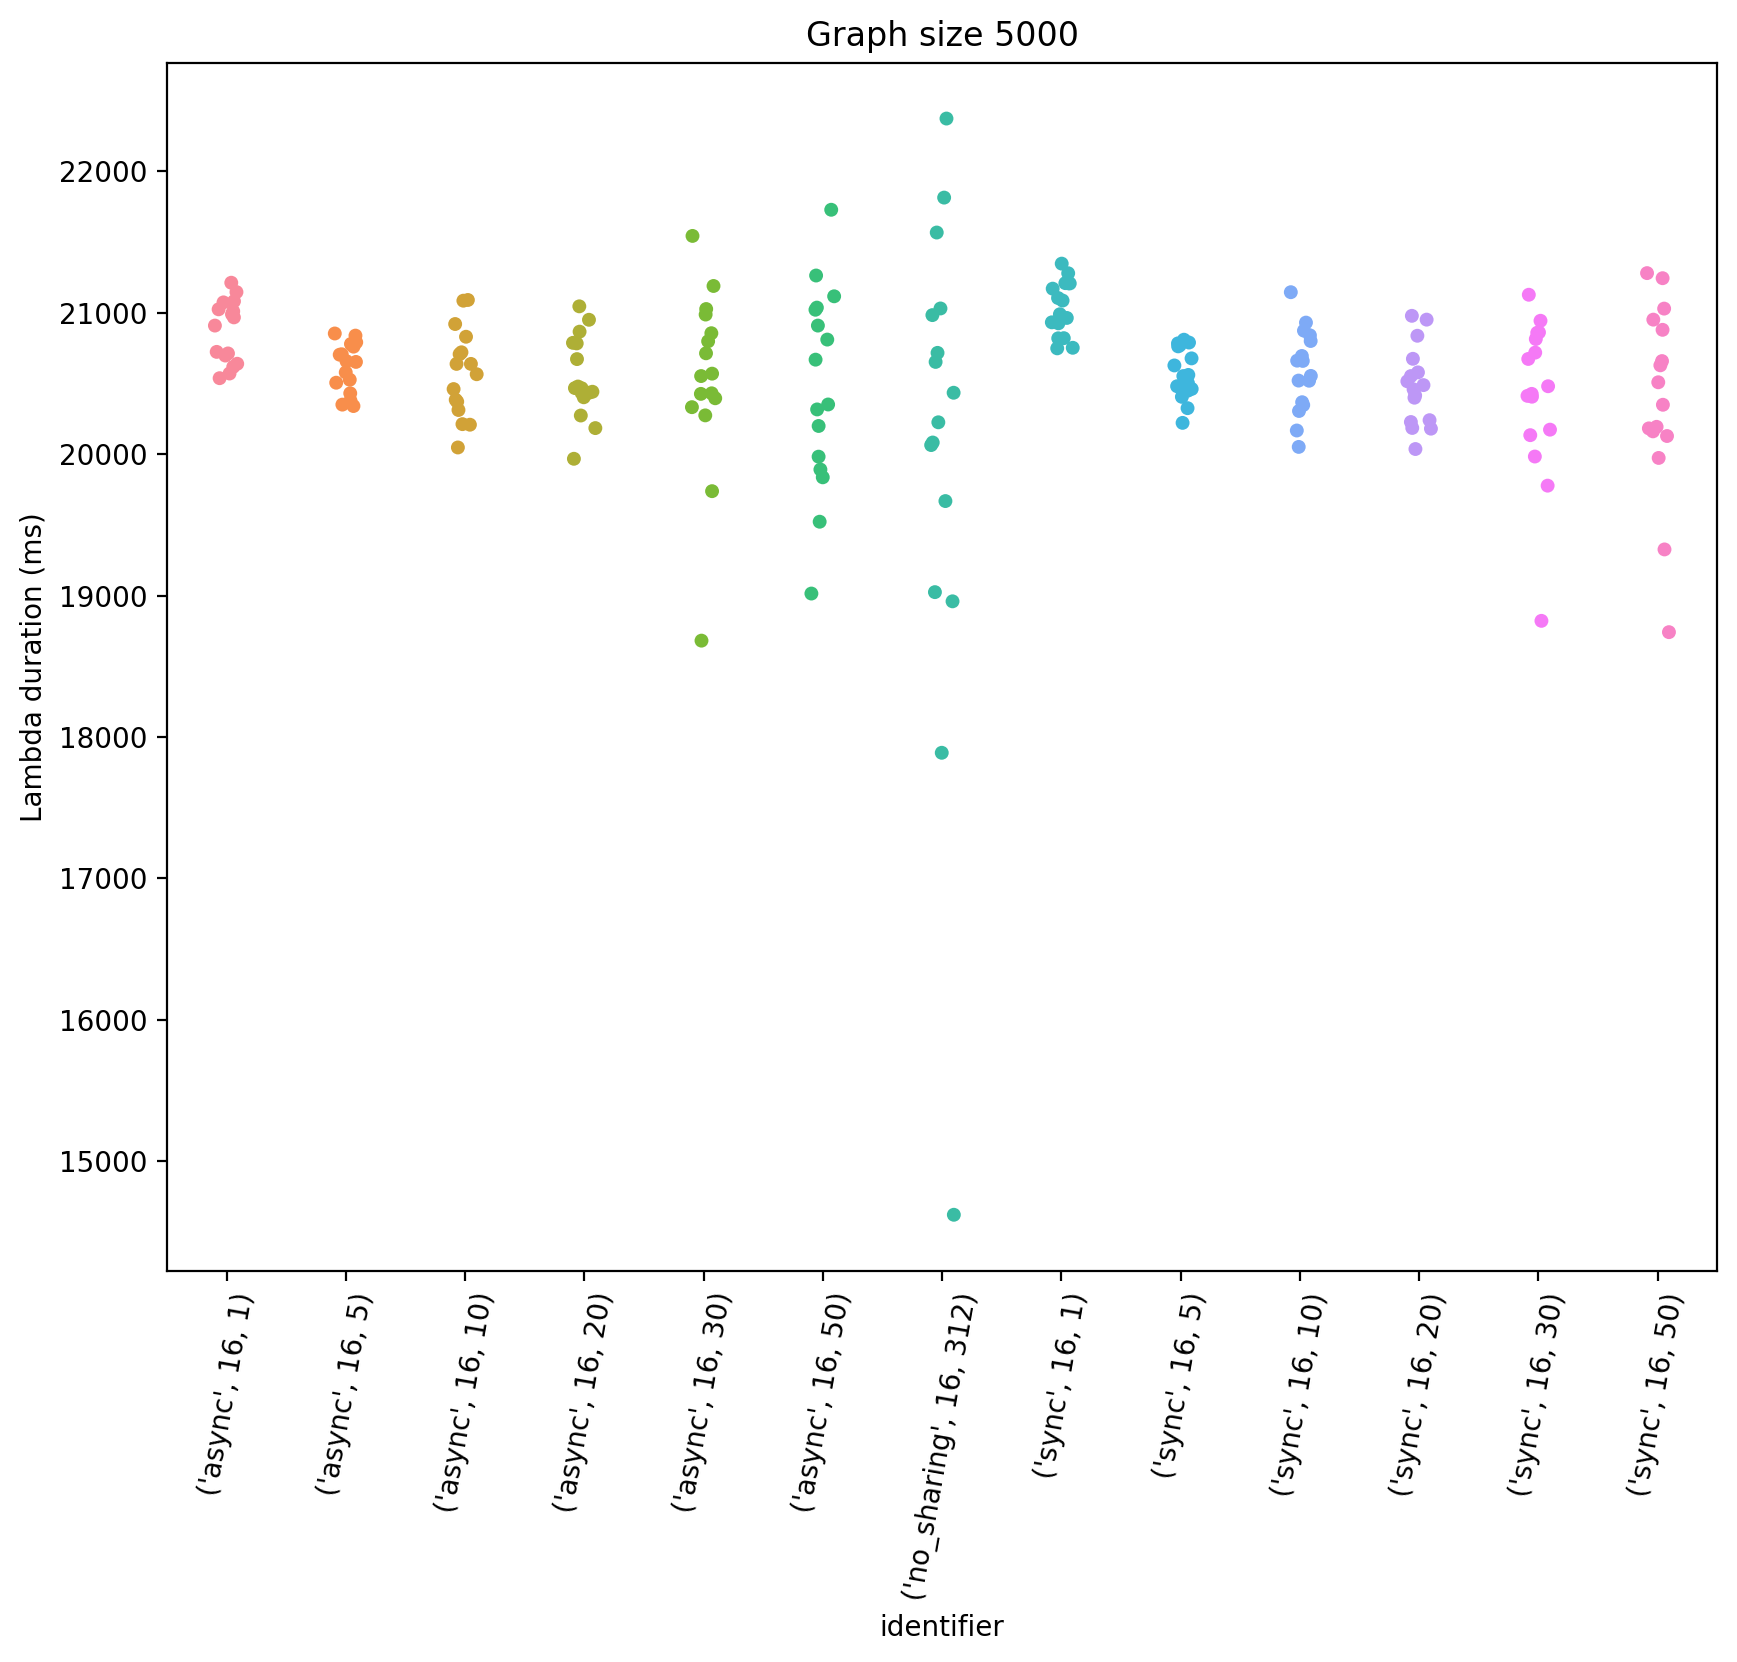

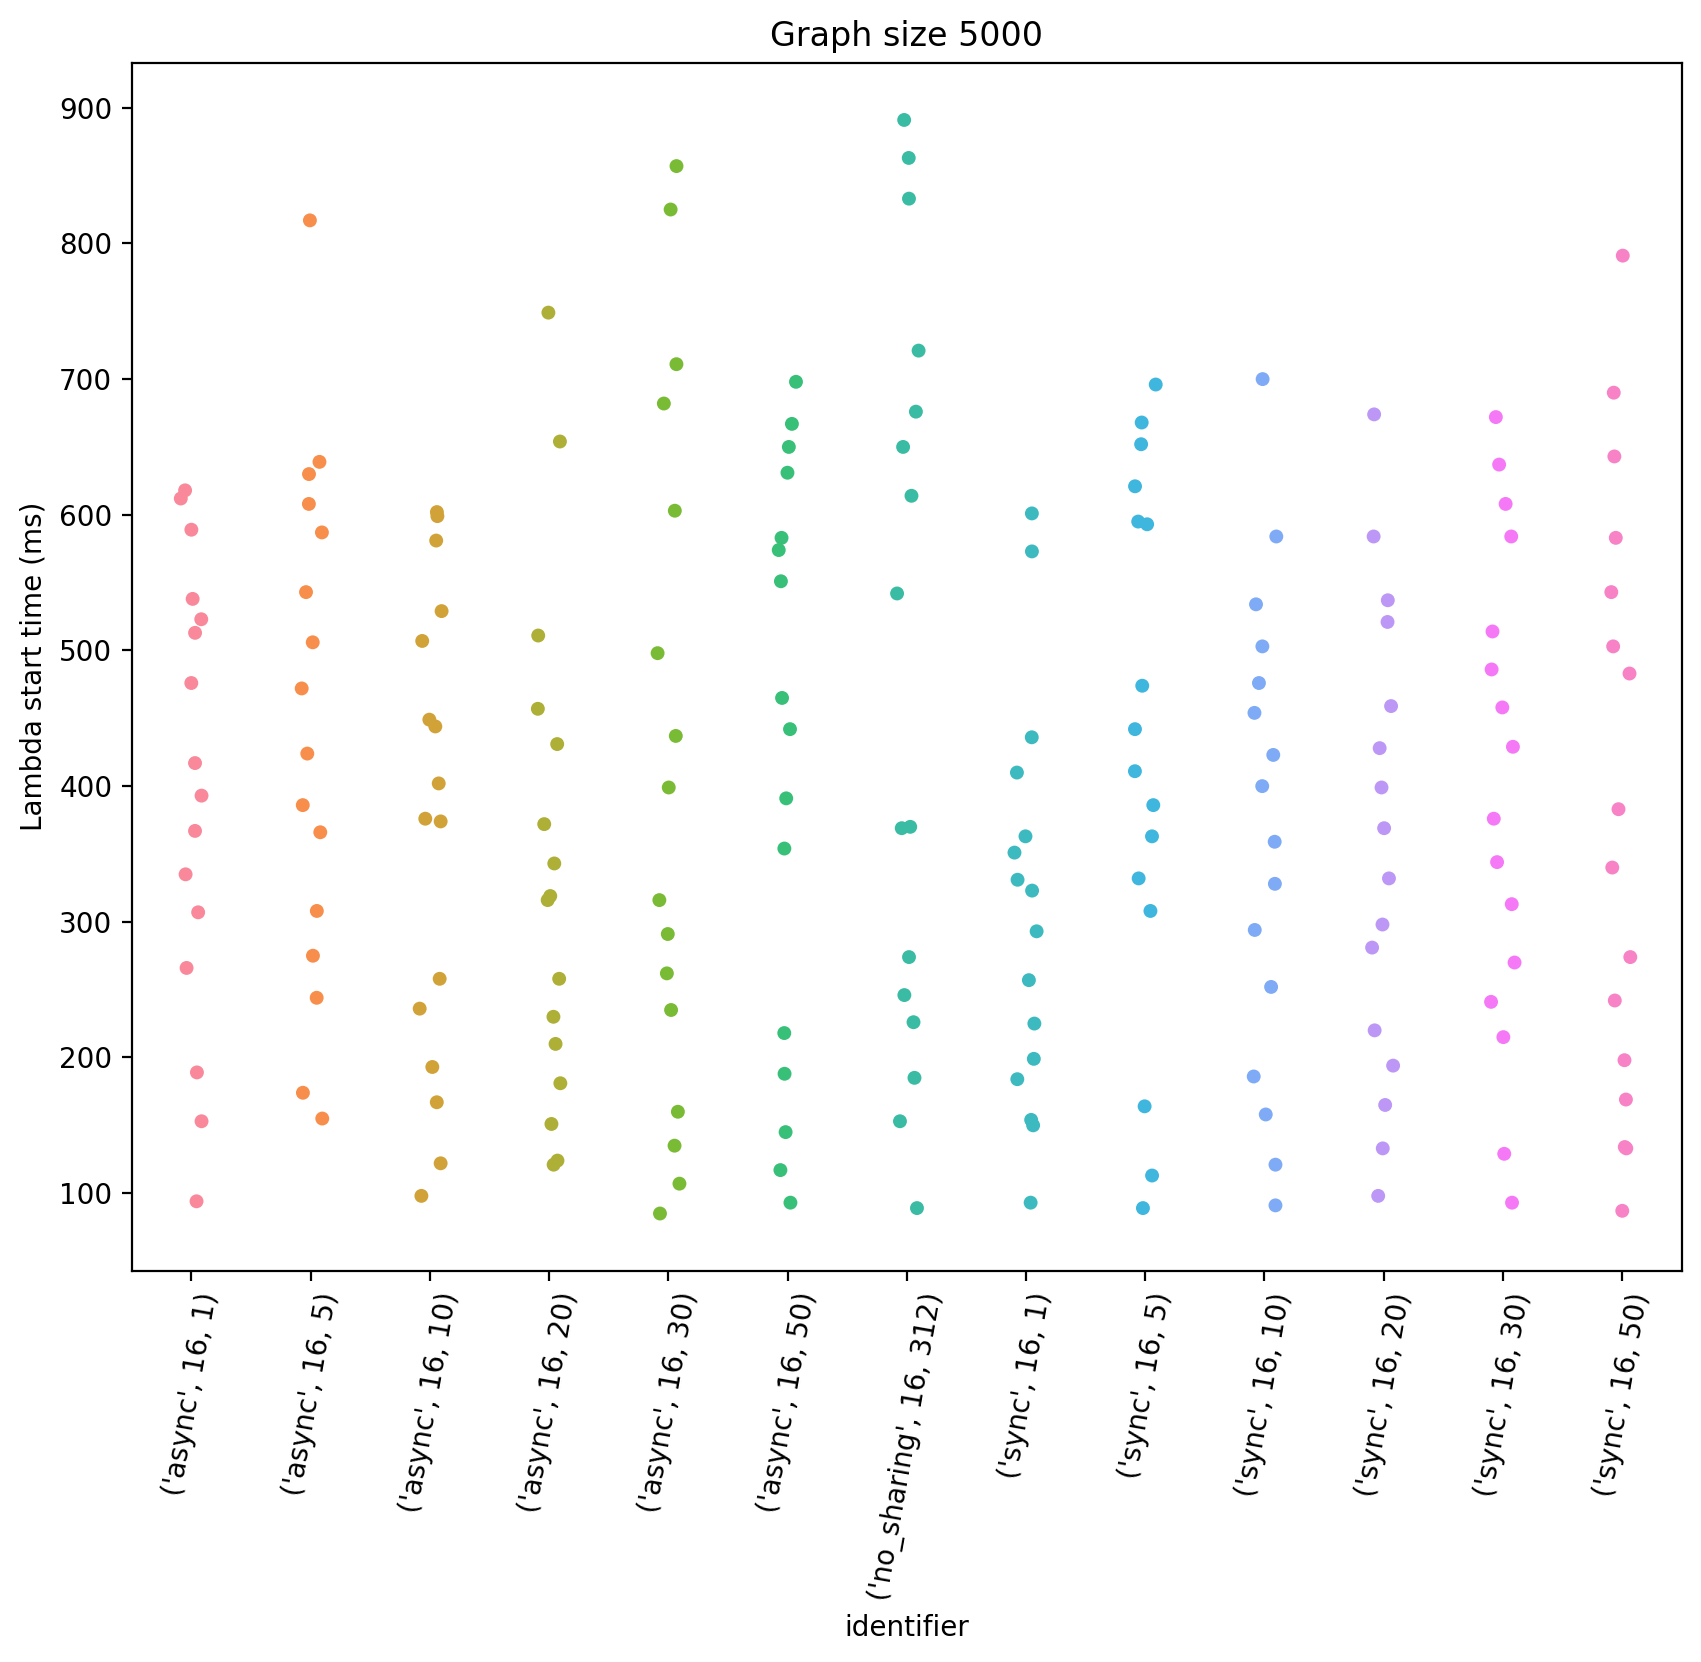

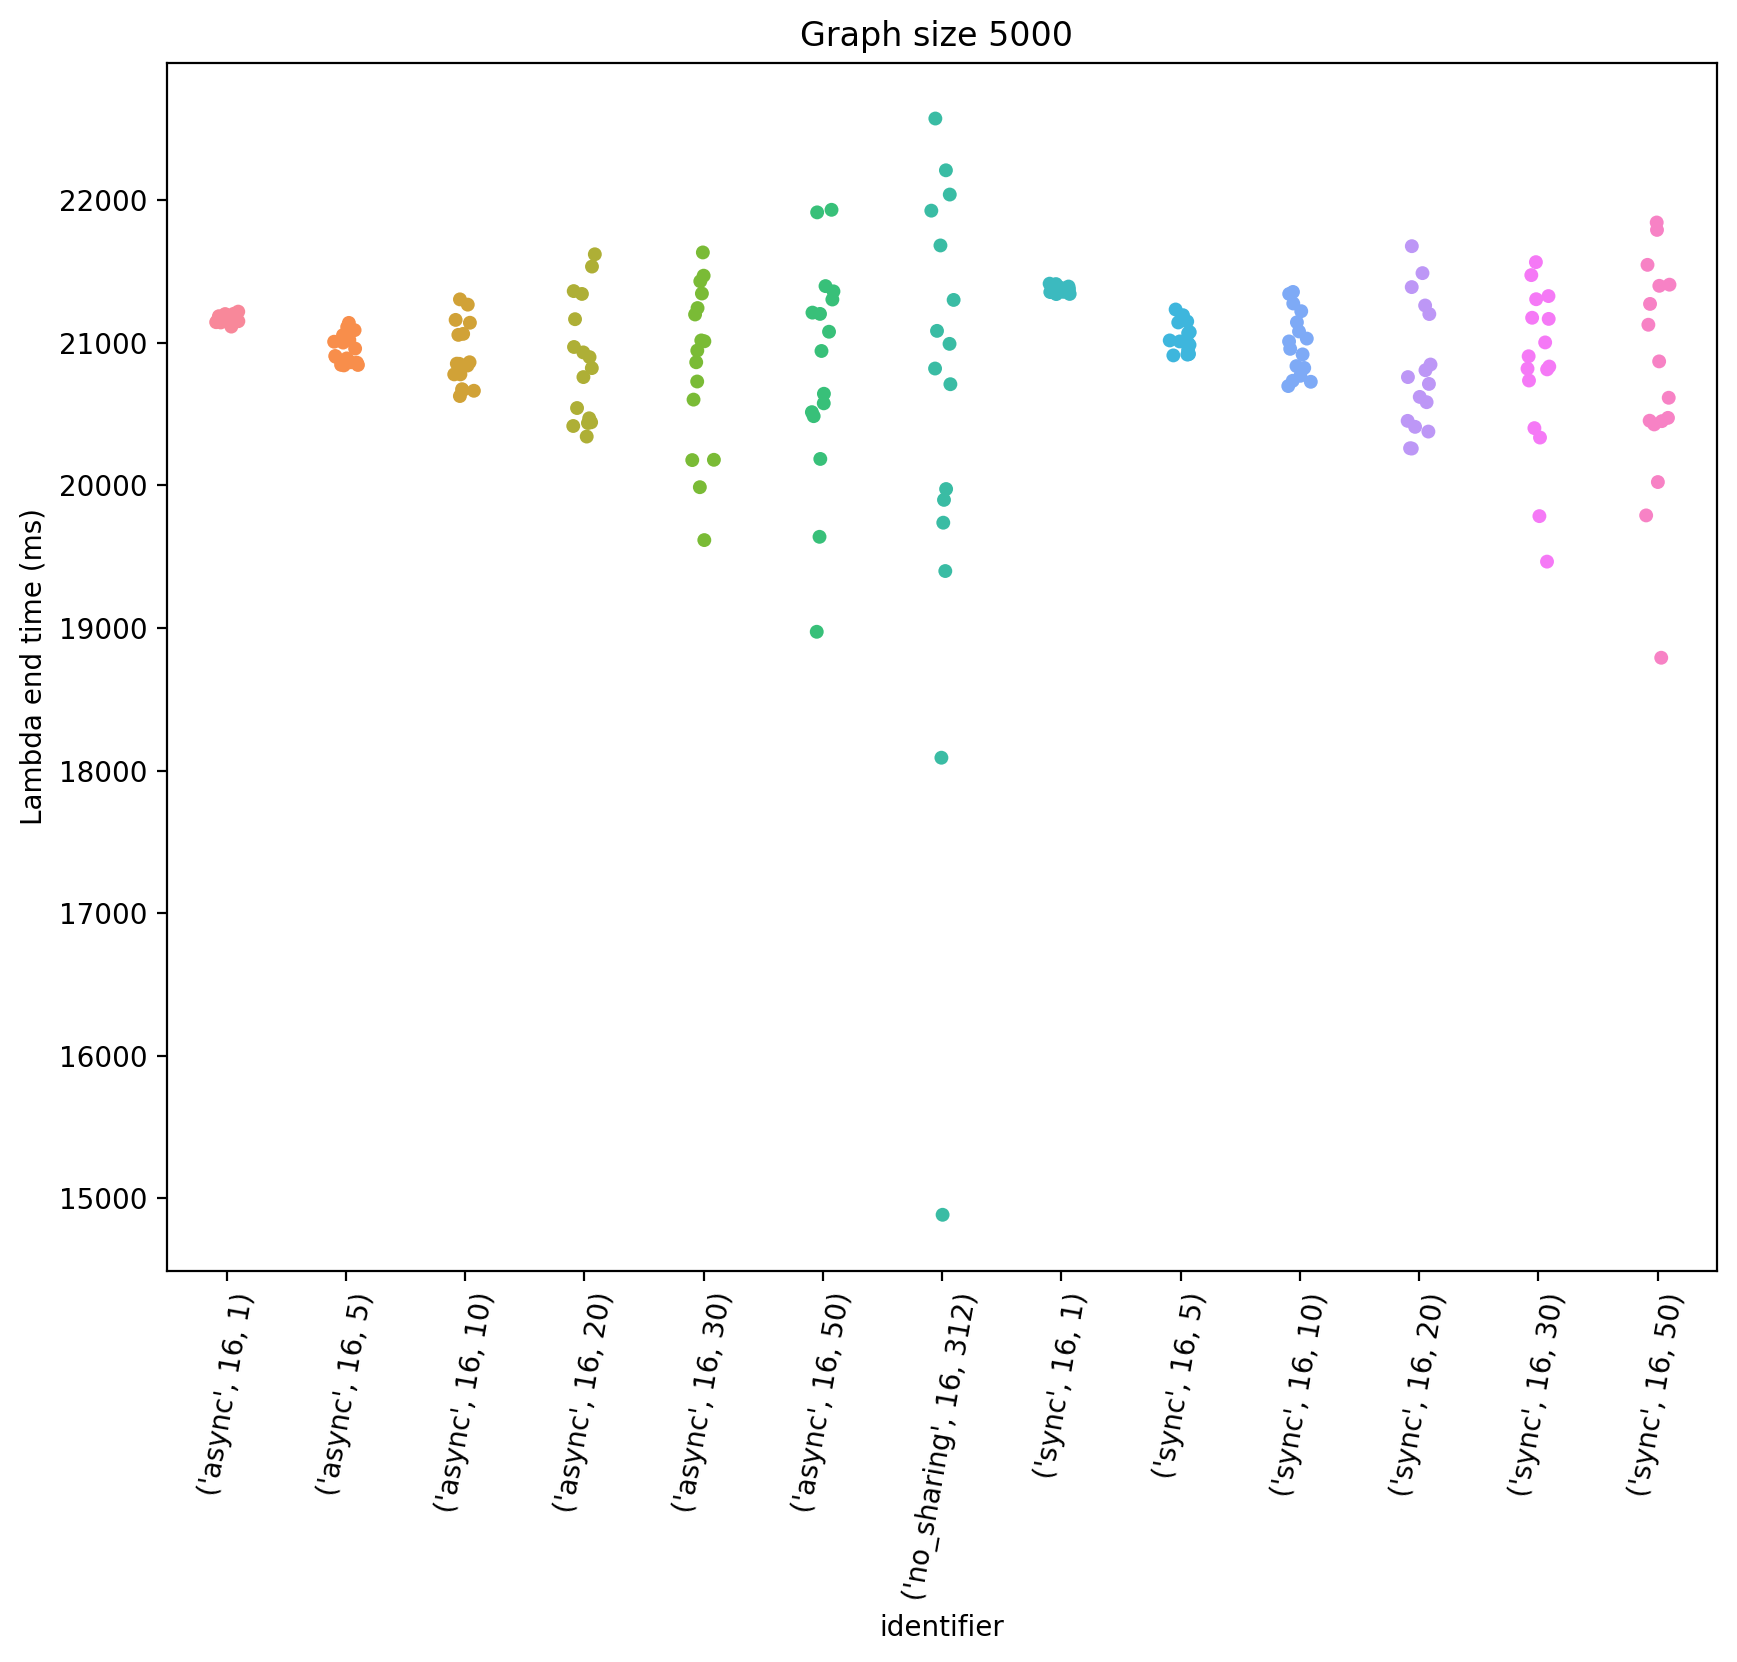

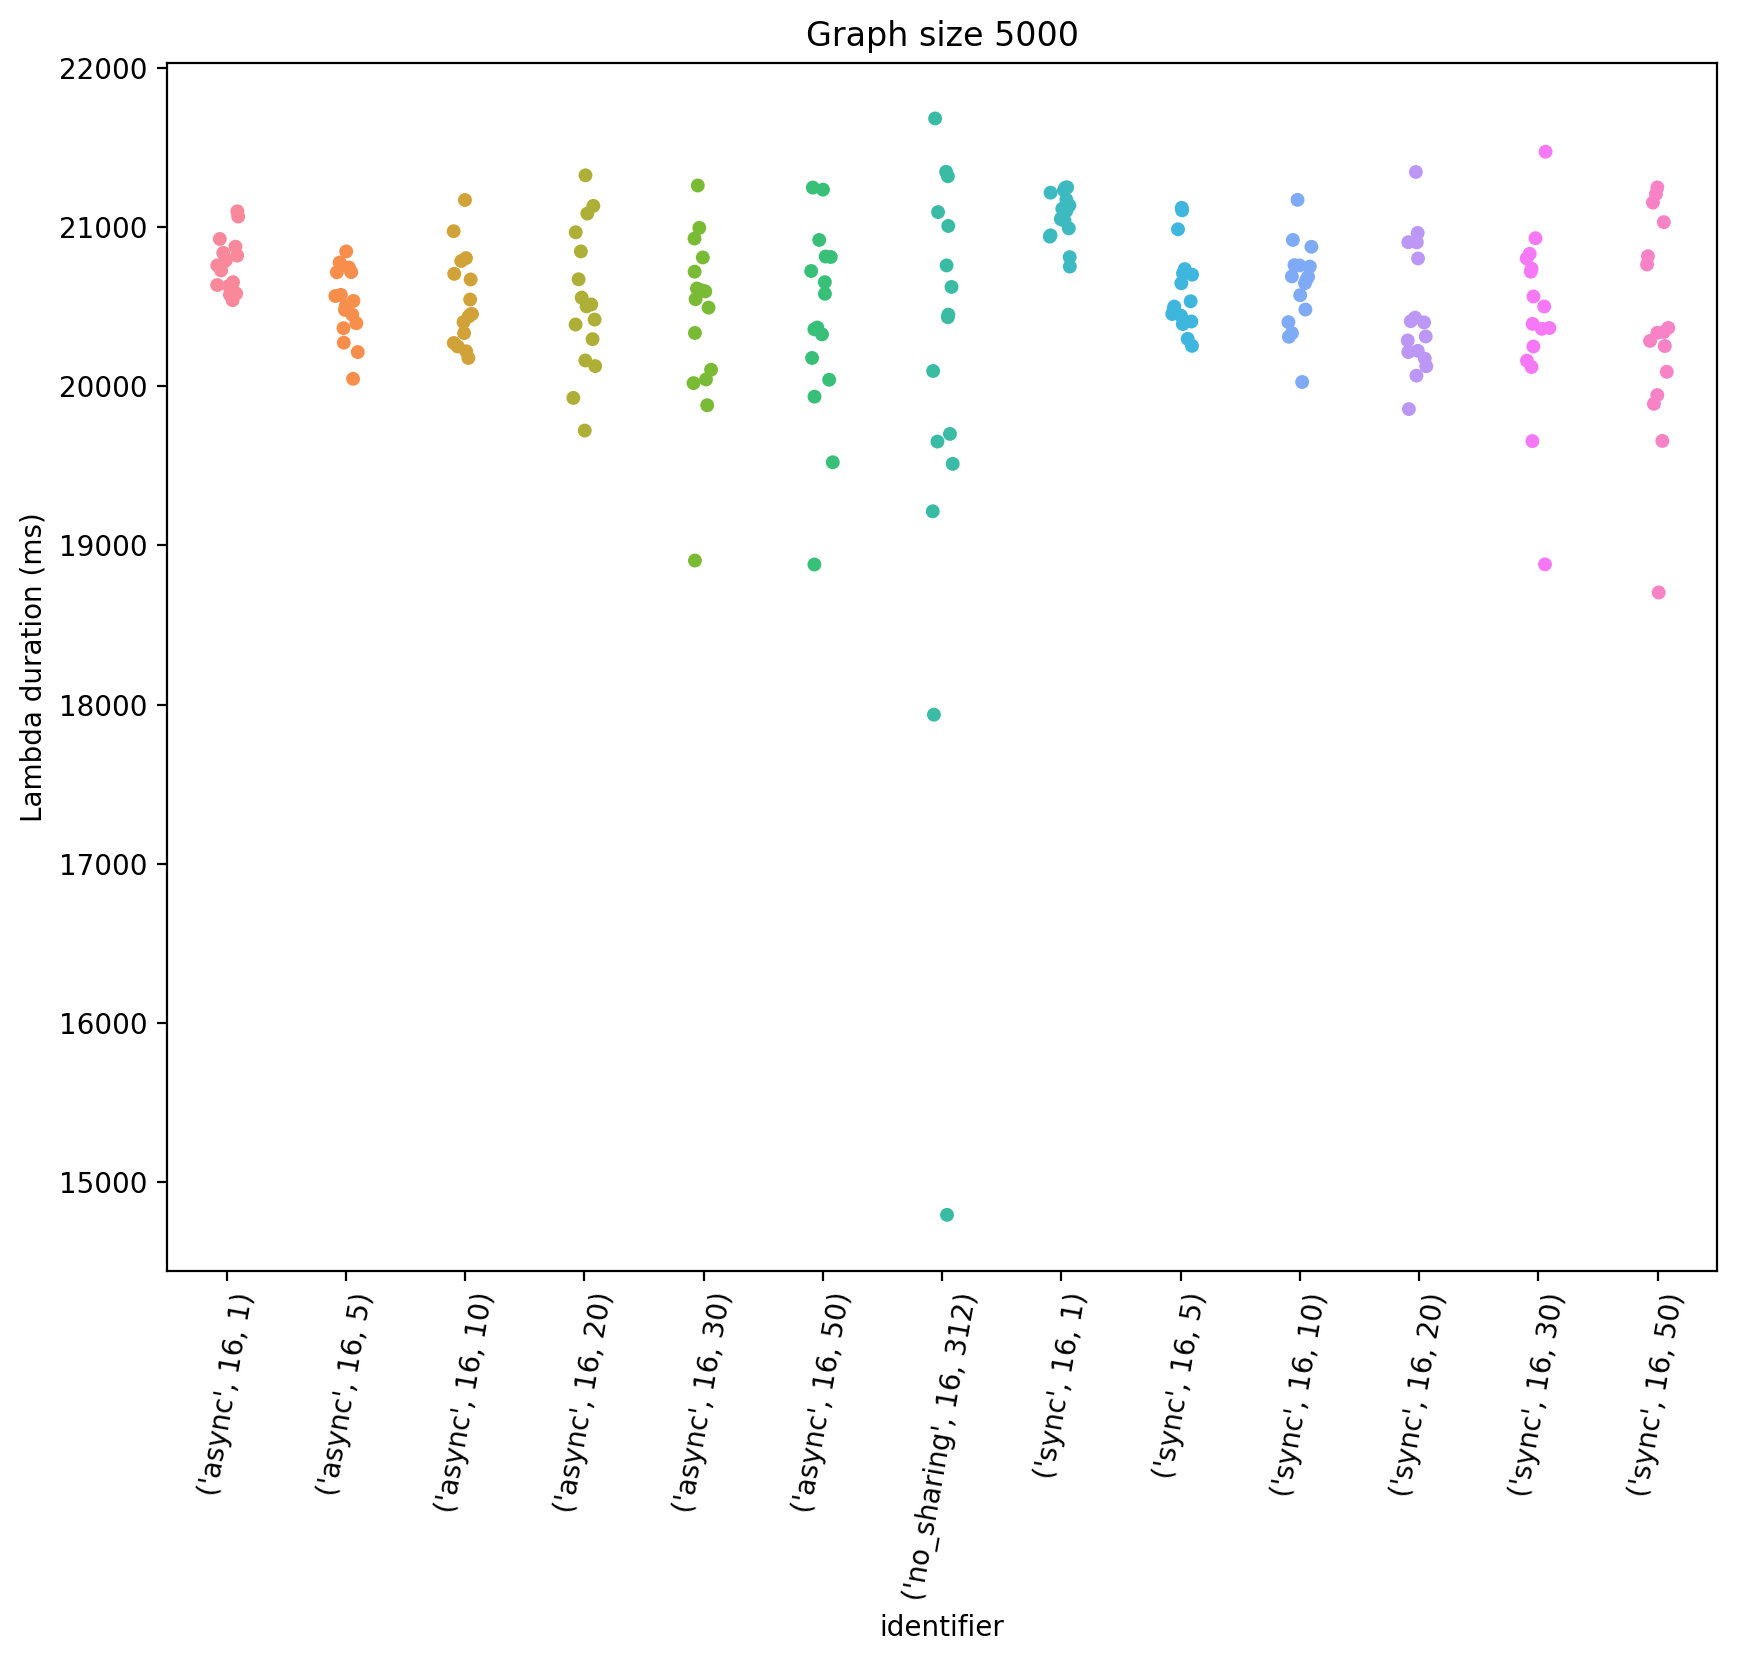

In [36]:
for (graph_size, trial_str), group in df.groupby(["graph_size", "trial_num"]):
    group = group.reset_index()
    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_start_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda start time (ms)")
    plt.title("Graph size {}".format(graph_size))
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_start_times_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size,  trial_str), bbox_inches="tight")

    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_end_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda end time (ms)")
    plt.title("Graph size {} ".format(graph_size, ))
    plt.xticks(rotation=80)
    
    plt.savefig("{}/lambda_end_times_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size, trial_str), bbox_inches="tight")


    plt.figure(figsize=(10, 8), dpi=200)
    sns.stripplot(y="lambda_duration", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda duration (ms)")
    plt.title("Graph size {}".format(graph_size,))
    plt.xticks(rotation=80)

    plt.savefig("{}/lambda_duration_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size, trial_str), bbox_inches="tight")



### End Time Comparison

<Figure size 2000x1600 with 0 Axes>

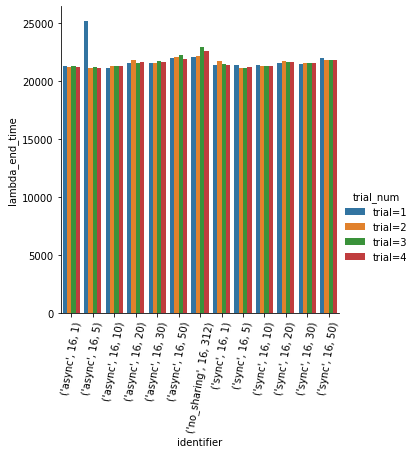

In [37]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"lambda_end_time": max})
    plt.figure(figsize=(10, 8), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="lambda_end_time", hue="trial_num", order=plot_order)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_last_end_time_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.show()

<Figure size 2000x1600 with 0 Axes>

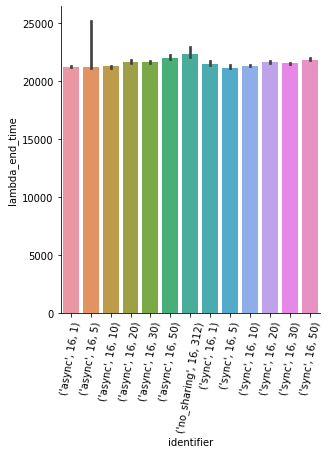

In [38]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"lambda_end_time": max})

    plt.figure(figsize=(10, 8), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="lambda_end_time", order=plot_order, estimator=np.median)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_last_end_time_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")

    plt.show()

### Cost comparison

In [39]:
cost_per_100_ms = 0.0000048958
df["cost"] = df["lambda_duration"] / 100 * cost_per_100_ms

<Figure size 2000x2000 with 0 Axes>

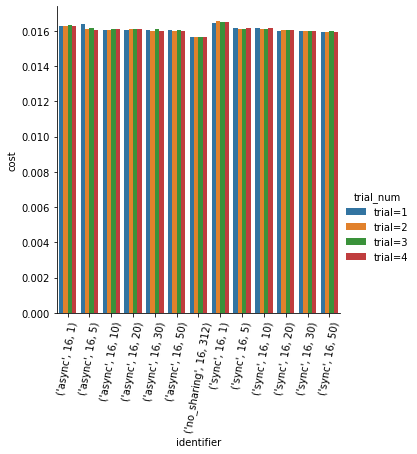

In [40]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"cost": sum})
    plt.figure(figsize=(10, 10), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="cost", hue="trial_num", order=plot_order)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_cost_by_trial_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.show()

               identifier trial_num      cost
0          (async, 16, 1)   trial=1  0.016299
1          (async, 16, 1)   trial=2  0.016298
2          (async, 16, 1)   trial=3  0.016347
3          (async, 16, 1)   trial=4  0.016268
4          (async, 16, 5)   trial=1  0.016382
5          (async, 16, 5)   trial=2  0.016127
6          (async, 16, 5)   trial=3  0.016149
7          (async, 16, 5)   trial=4  0.016068
8         (async, 16, 10)   trial=1  0.016040
9         (async, 16, 10)   trial=2  0.016074
10        (async, 16, 10)   trial=3  0.016116
11        (async, 16, 10)   trial=4  0.016090
12        (async, 16, 20)   trial=1  0.016030
13        (async, 16, 20)   trial=2  0.016085
14        (async, 16, 20)   trial=3  0.016090
15        (async, 16, 20)   trial=4  0.016089
16        (async, 16, 30)   trial=1  0.016024
17        (async, 16, 30)   trial=2  0.016022
18        (async, 16, 30)   trial=3  0.016083
19        (async, 16, 30)   trial=4  0.016001
20        (async, 16, 50)   trial=

<Figure size 2000x1600 with 0 Axes>

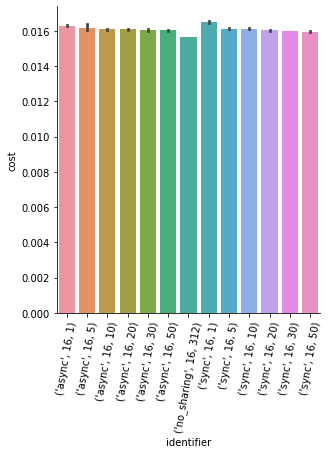

In [41]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"cost": sum})
    print(group)
    plt.figure(figsize=(10, 8), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="cost", order=plot_order, estimator=np.median)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_cost_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,), bbox_inches="tight")
    plt.show()

In [42]:
SAVE_ROOT

'../build/aggregate_figures/16'